# Physics 361 Software Lab 2
### Group Members: Brandon Weiss
###### Date: 3/12/2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [2]:
# Defining constants
g = 9.81 # m/s^2
m = 1 # kg
k = 1 # N/m
v0 = 0 # m/s
x0 = -1 # m
b = 0.4 # kg/s
F0 = 1 # N

From part b:
$$x(t) = c_1e^{(-\beta + \sqrt{\beta^2 - \omega_0^2})t} + c_2e^{(-\beta - \sqrt{\beta^2 - \omega_0^2})t} + \frac{F_0}{m\sqrt{(\omega_0^2 - \omega^2)^2 + (2\beta\omega)^2}}cos(\omega t - Arctan(\frac{2\beta\omega}{\omega_0^2 - \omega^2}))$$
$$x(0) = c_1 + c_2 + \frac{F_0}{m\sqrt{(\omega_0^2 - \omega^2)^2 + (2\beta\omega)^2}}cos(-Arctan(\frac{2\beta\omega}{\omega_0^2 - \omega^2})) = -1$$
$$v(0) = (-\beta + \sqrt{\beta^2 - \omega_0^2})c_1 + (-\beta - \sqrt{\beta^2 - \omega_0^2})c_2 - \frac{F_0\omega}{m\sqrt{(\omega_0^2 - \omega^2)^2 + (2\beta\omega)^2}}sin(-Arctan(\frac{2\beta\omega}{\omega_0^2 - \omega^2})) = 0$$

### Part C
##### Making plots of the harmonic oscillator's motion

In [3]:
# defining more constants
omega0 = (k/m)**0.5 # s^-1
beta = 0.5*b/m # s^-1
omega1 = (omega0**2 - beta**2)**0.5 # s^-1
A = F0/m # m/s^2

In [4]:
# Case 1: w/w1 = 1/9
omega = omega1/9 # s^-1
R = ((omega0**2 - omega**2)**2 + (2*beta*omega)**2)**0.5 # s^-2
phi = np.arctan(2*beta*omega / (omega0**2 - omega**2)) # radians
x0new = x0 - (A/R)*np.cos(-1*phi)
v0new = v0 + (A*omega/R)*np.sin(-1*phi)
c1 = (v0new + (beta + (beta**2 - omega0**2)**0.5)*x0new) / (2*(beta**2 - omega0**2)**0.5)
c2 = (-1*v0new + (-1*beta + (beta**2 - omega0**2)**0.5)*x0new) / (2*(beta**2 - omega0**2)**0.5)
# c1 and c2 calculated from problem 5.30 on homework 3
times = np.linspace(0, 200, 3001)

# Using formulas calculated in part b
xc = [c1*np.exp((-1*beta + (beta**2 - omega0**2)**0.5)*t) + 
      c2*np.exp((-1*beta - (beta**2 - omega0**2)**0.5)*t) for t in times]
xp = [(A/R)*np.cos(omega*t - phi) for t in times]
x = np.add(xc, xp)

C:\Users\bmwei\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


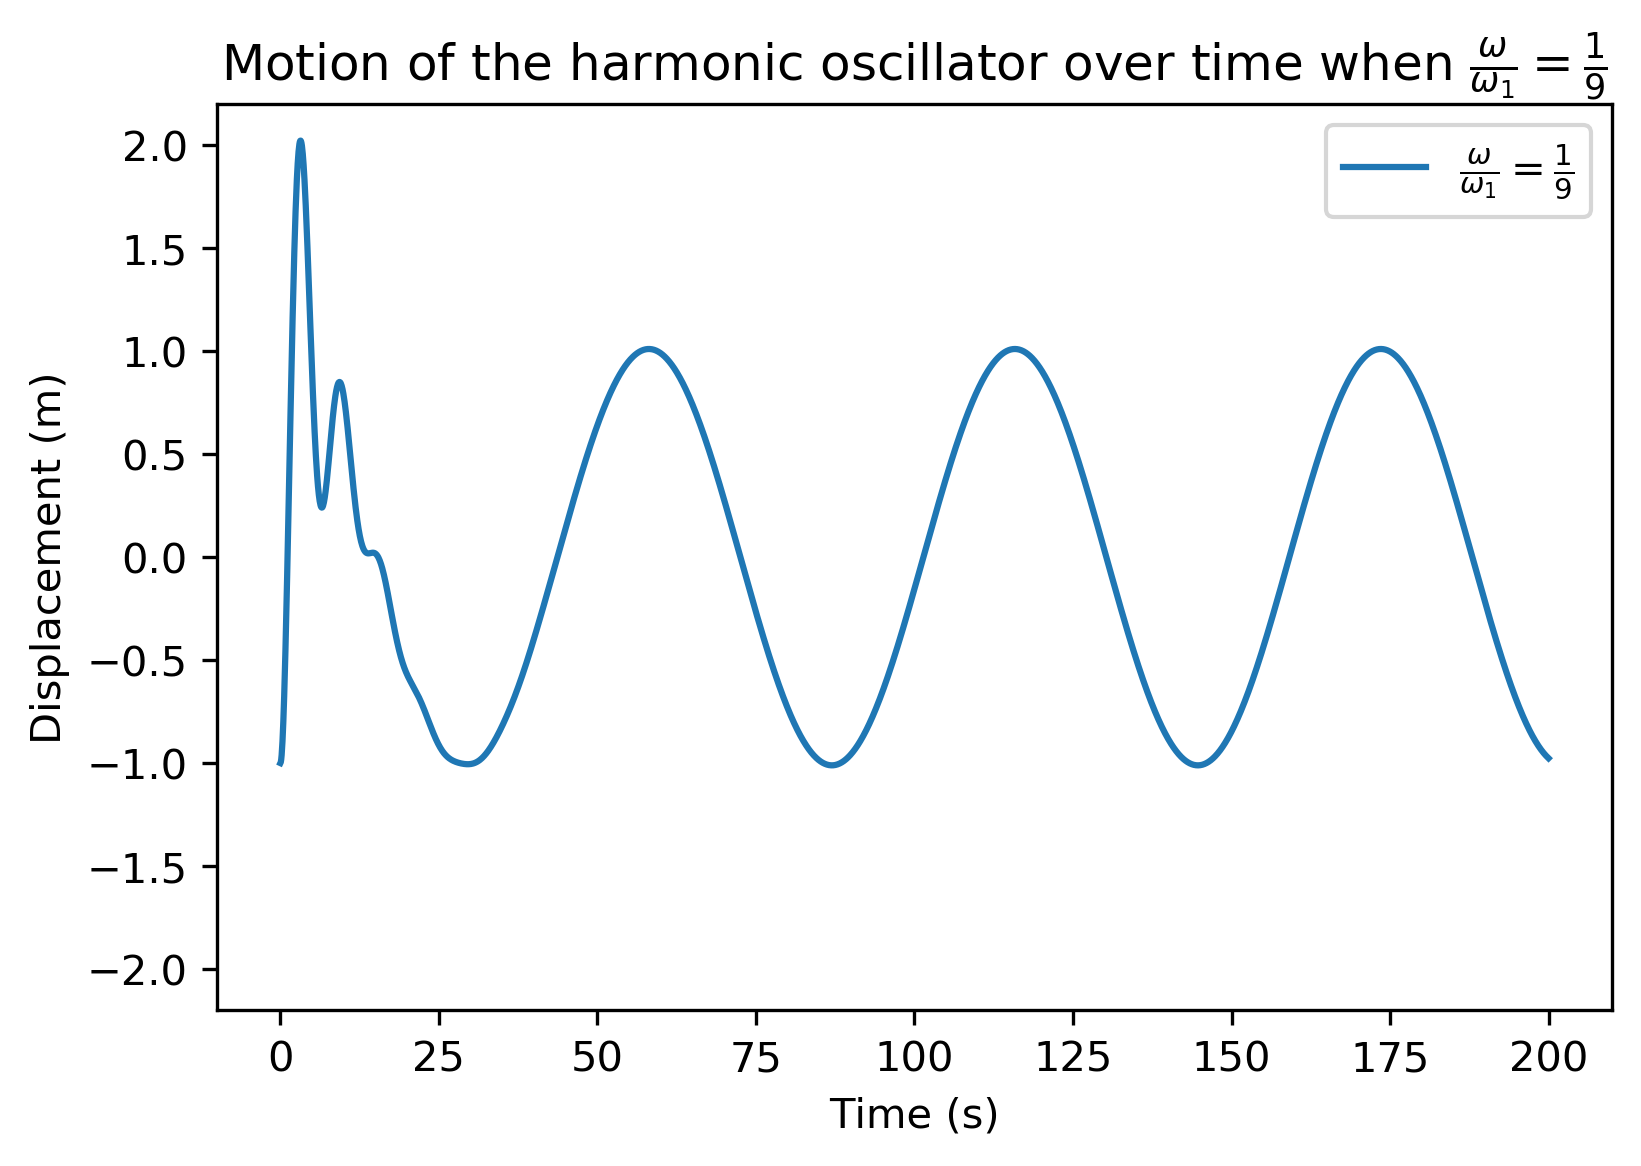

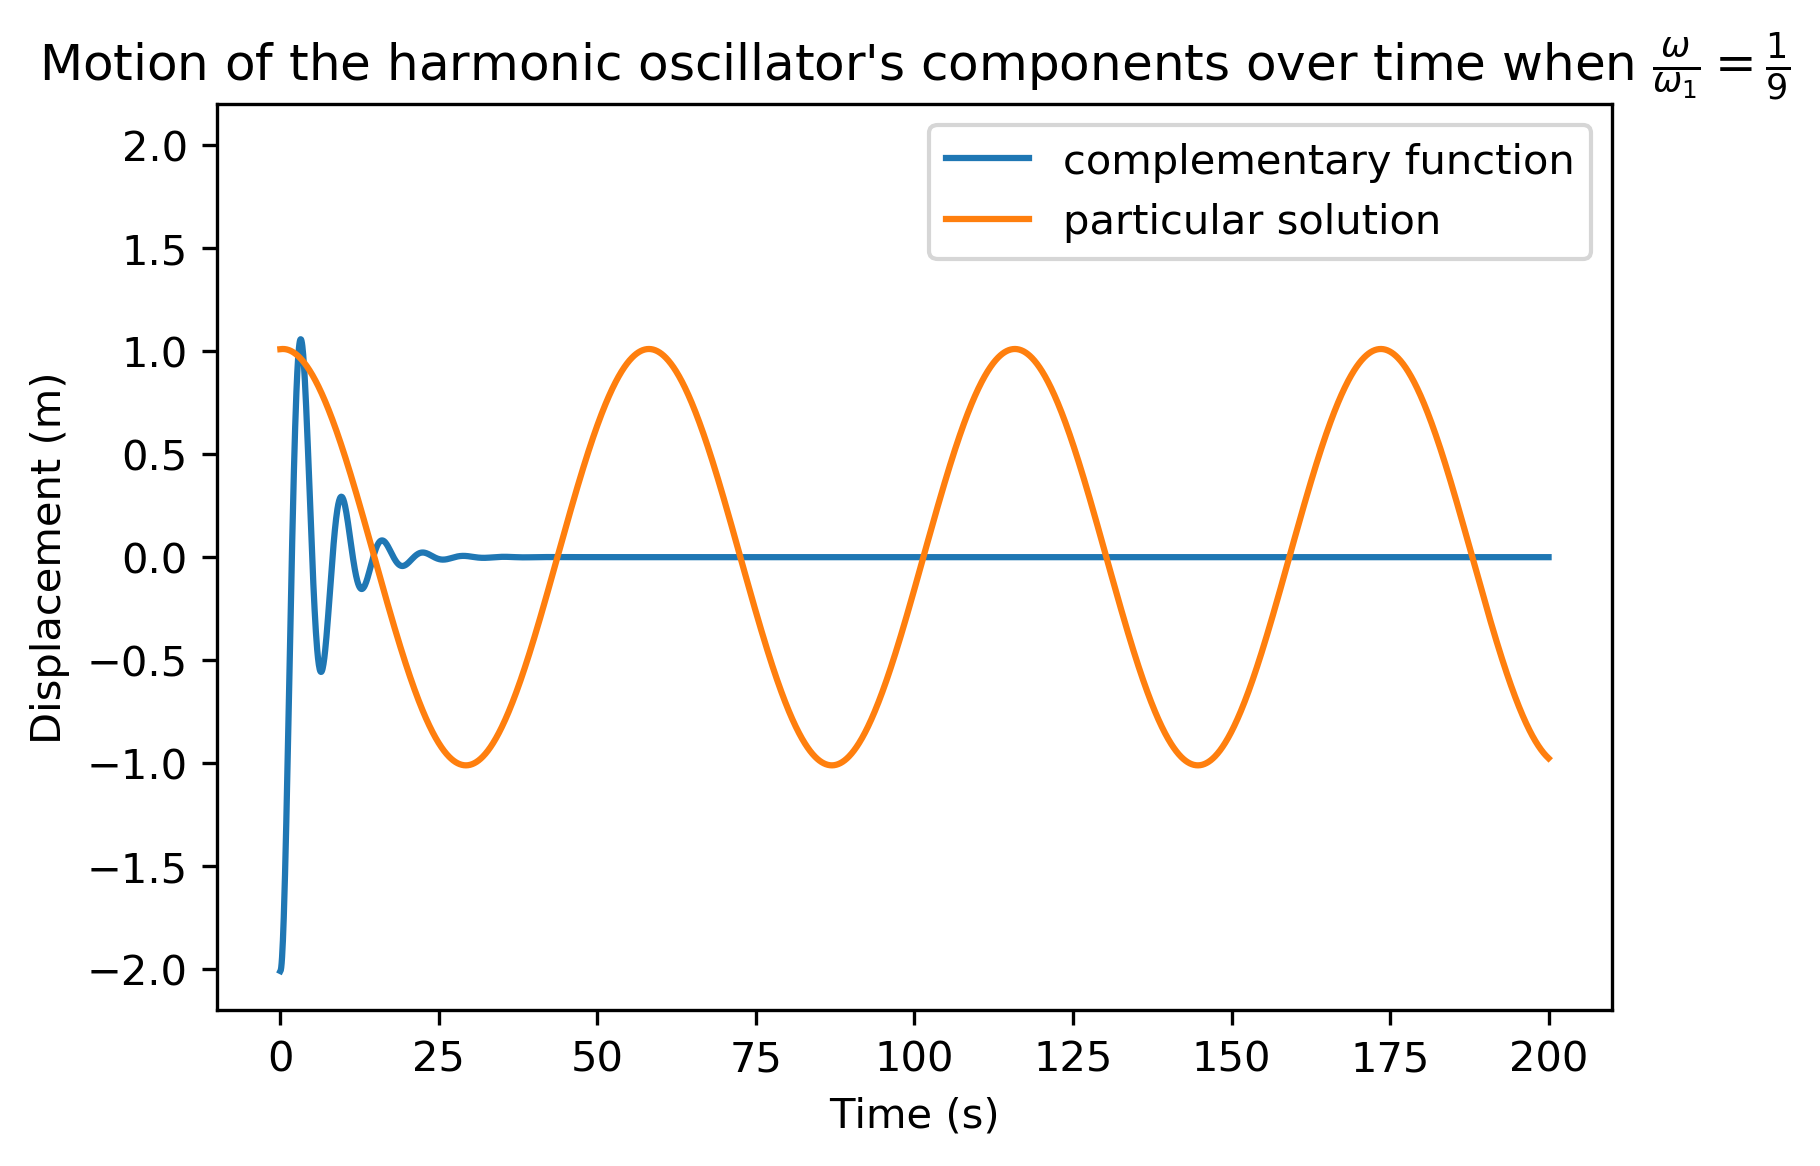

In [5]:
plt.figure(dpi=300)
plt.plot(times, x, label=r'$\frac{\omega}{\omega_1} = \frac{1}{9}$')
plt.ylim(-2.2, 2.2)
plt.title(r"Motion of the harmonic oscillator over time when $\frac{\omega}{\omega_1} = \frac{1}{9}$")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.plot(times, xc, label='complementary function')
plt.plot(times, xp, label='particular solution')
plt.ylim(-2.2, 2.2)
plt.title(r"Motion of the harmonic oscillator's components over time when $\frac{\omega}{\omega_1} = \frac{1}{9}$")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

In [6]:
# Case 2: w/w1 = 0.9
omega_2 = omega1*0.9 # s^-1
R_2 = ((omega0**2 - omega_2**2)**2 + (2*beta*omega_2)**2)**0.5 # s^-2
phi_2 = np.arctan(2*beta*omega_2 / (omega0**2 - omega_2**2)) # radians
x0new_2 = x0 - (A/R_2)*np.cos(-1*phi_2)
v0new_2 = v0 + (A*omega_2/R_2)*np.sin(-1*phi_2)
c1_2 = (v0new_2 + (beta + (beta**2 - omega0**2)**0.5)*x0new_2) / (2*(beta**2 - omega0**2)**0.5)
c2_2 = (-1*v0new_2 + (-1*beta + (beta**2 - omega0**2)**0.5)*x0new_2) / (2*(beta**2 - omega0**2)**0.5)
# c1 and c2 calculated from problem 5.30 on homework 3
times_2 = np.linspace(0, 50, 1001)

# Using formulas calculated in part b
xc_2 = [c1_2*np.exp((-1*beta + (beta**2 - omega0**2)**0.5)*t) + 
      c2_2*np.exp((-1*beta - (beta**2 - omega0**2)**0.5)*t) for t in times_2]
xp_2 = [(A/R_2)*np.cos(omega_2*t - phi_2) for t in times_2]
x_2 = np.add(xc_2, xp_2)

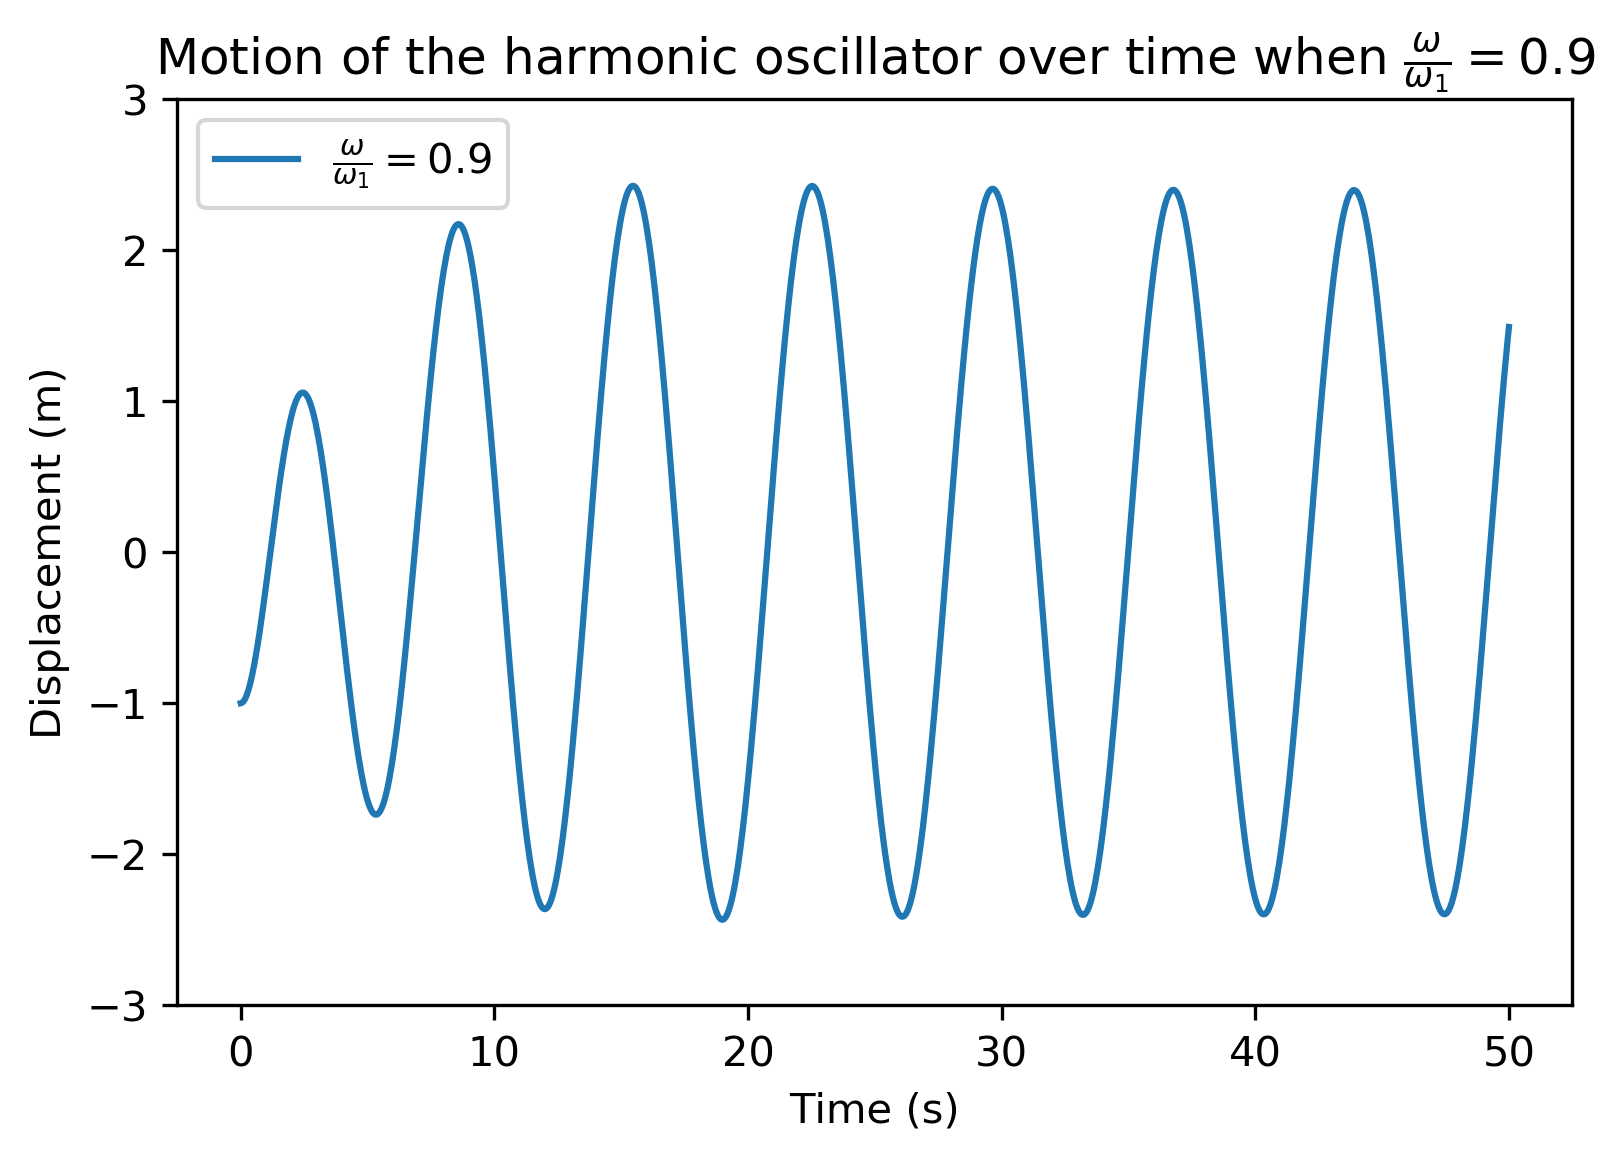

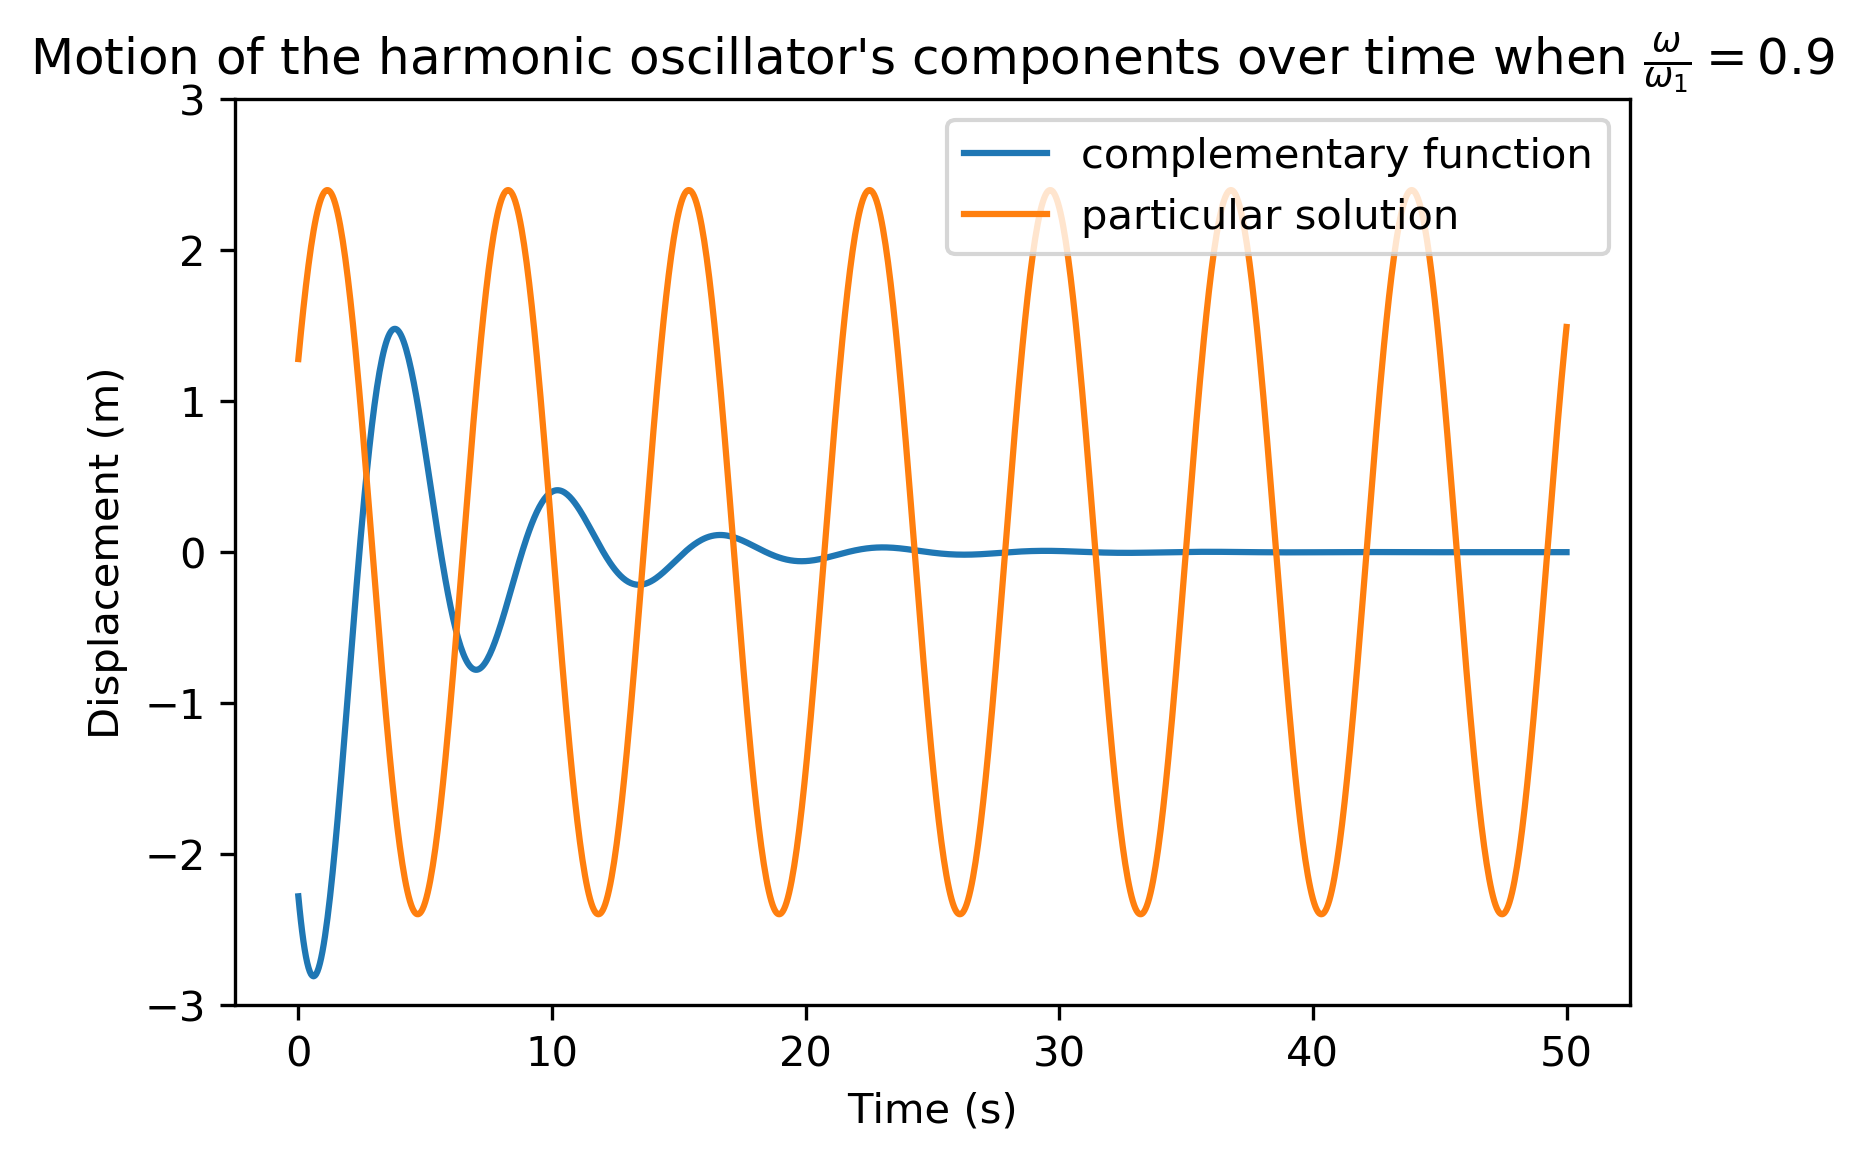

In [7]:
plt.figure(dpi=300)
plt.plot(times_2, x_2, label=r'$\frac{\omega}{\omega_1} = 0.9$')
plt.ylim(-3, 3)
plt.title(r"Motion of the harmonic oscillator over time when $\frac{\omega}{\omega_1} = 0.9$")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.plot(times_2, xc_2, label='complementary function')
plt.plot(times_2, xp_2, label='particular solution')
plt.ylim(-3, 3)
plt.title(r"Motion of the harmonic oscillator's components over time when $\frac{\omega}{\omega_1} = 0.9$")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

In [8]:
# Case 1: w/w1 = 6
omega_3 = omega1*6 # s^-1
R_3 = ((omega0**2 - omega_3**2)**2 + (2*beta*omega_3)**2)**0.5 # s^-2
phi_3 = np.arctan(2*beta*omega_3 / (omega0**2 - omega_3**2)) # radians
x0new_3 = x0 - (A/R_3)*np.cos(-1*phi_3)
v0new_3 = v0 + (A*omega_3/R_3)*np.sin(-1*phi_3)
c1_3 = (v0new_3 + (beta + (beta**2 - omega0**2)**0.5)*x0new_3) / (2*(beta**2 - omega0**2)**0.5)
c2_3 = (-1*v0new_3 + (-1*beta + (beta**2 - omega0**2)**0.5)*x0new_3) / (2*(beta**2 - omega0**2)**0.5)
# c1 and c2 calculated from problem 5.30 on homework 3
times_3 = np.linspace(0, 50, 1001)

# Using formulas calculated in part b
xc_3 = [c1_3*np.exp((-1*beta + (beta**2 - omega0**2)**0.5)*t) + 
      c2_3*np.exp((-1*beta - (beta**2 - omega0**2)**0.5)*t) for t in times_3]
xp_3 = [(A/R_3)*np.cos(omega_3*t - phi_3) for t in times_3]
x_3 = np.add(xc_3, xp_3)

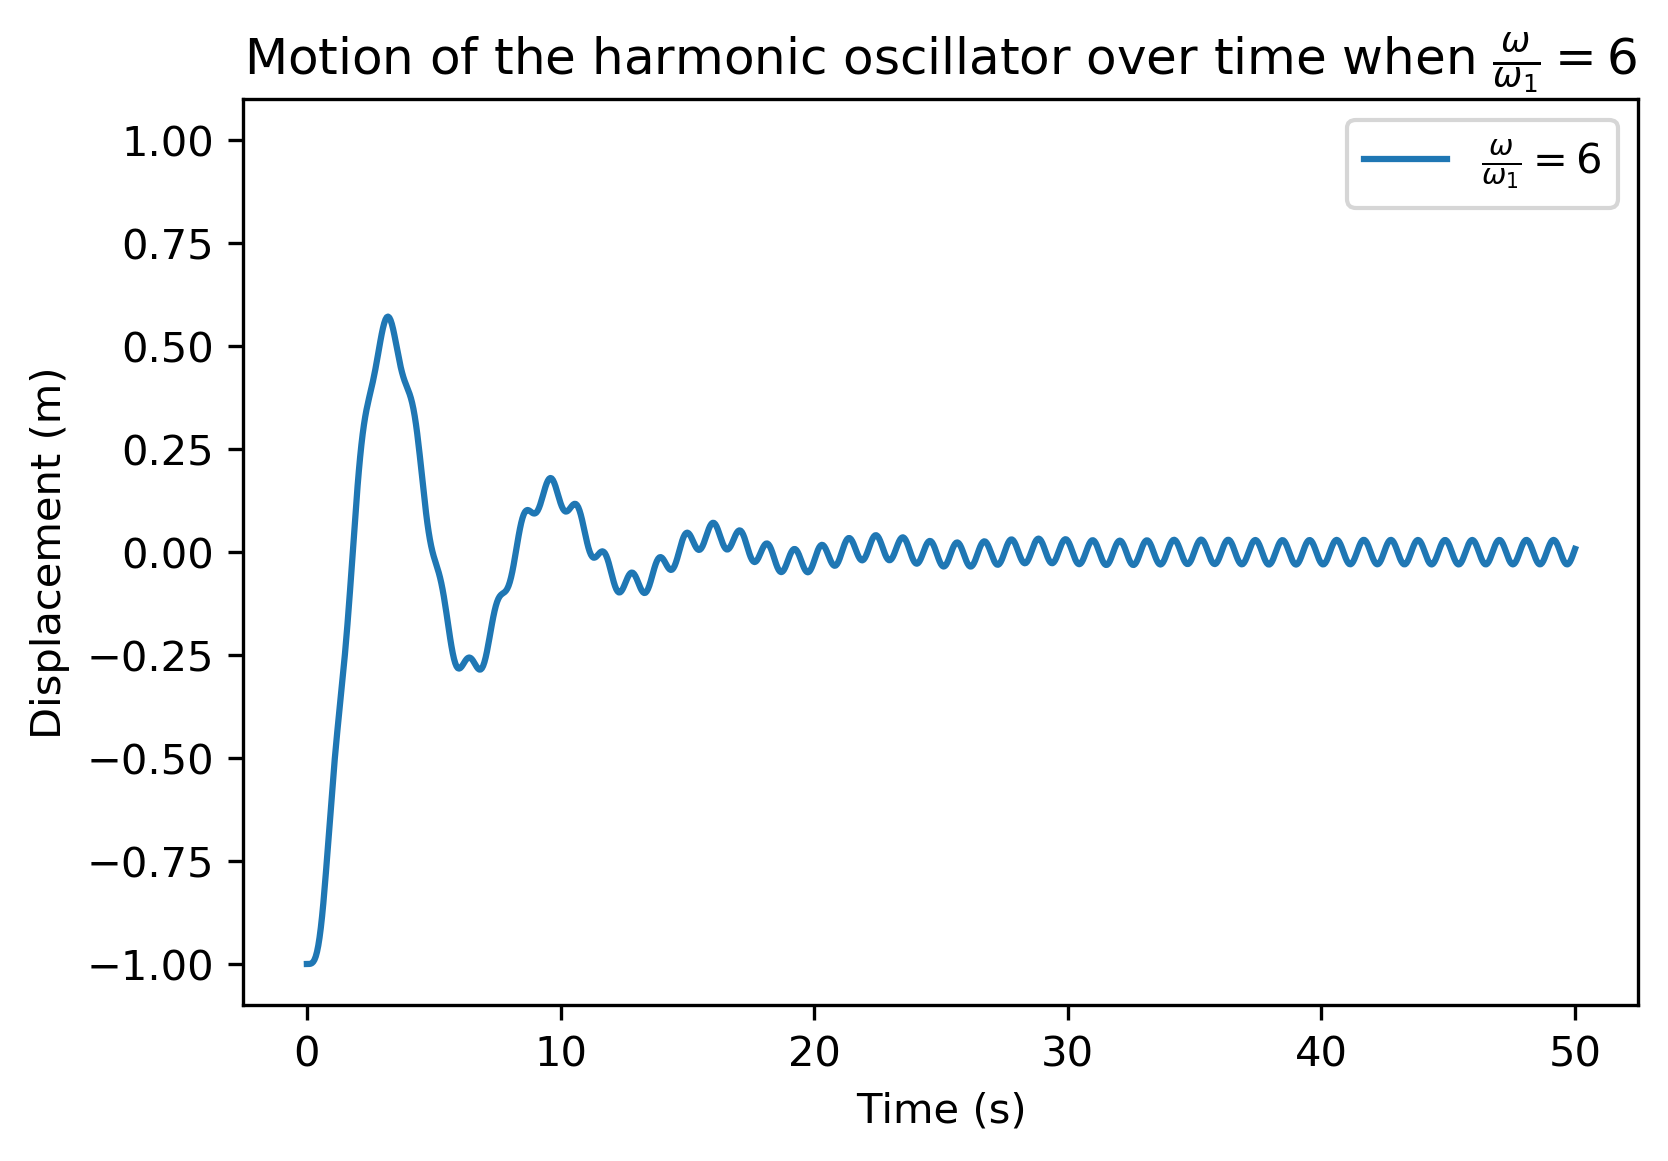

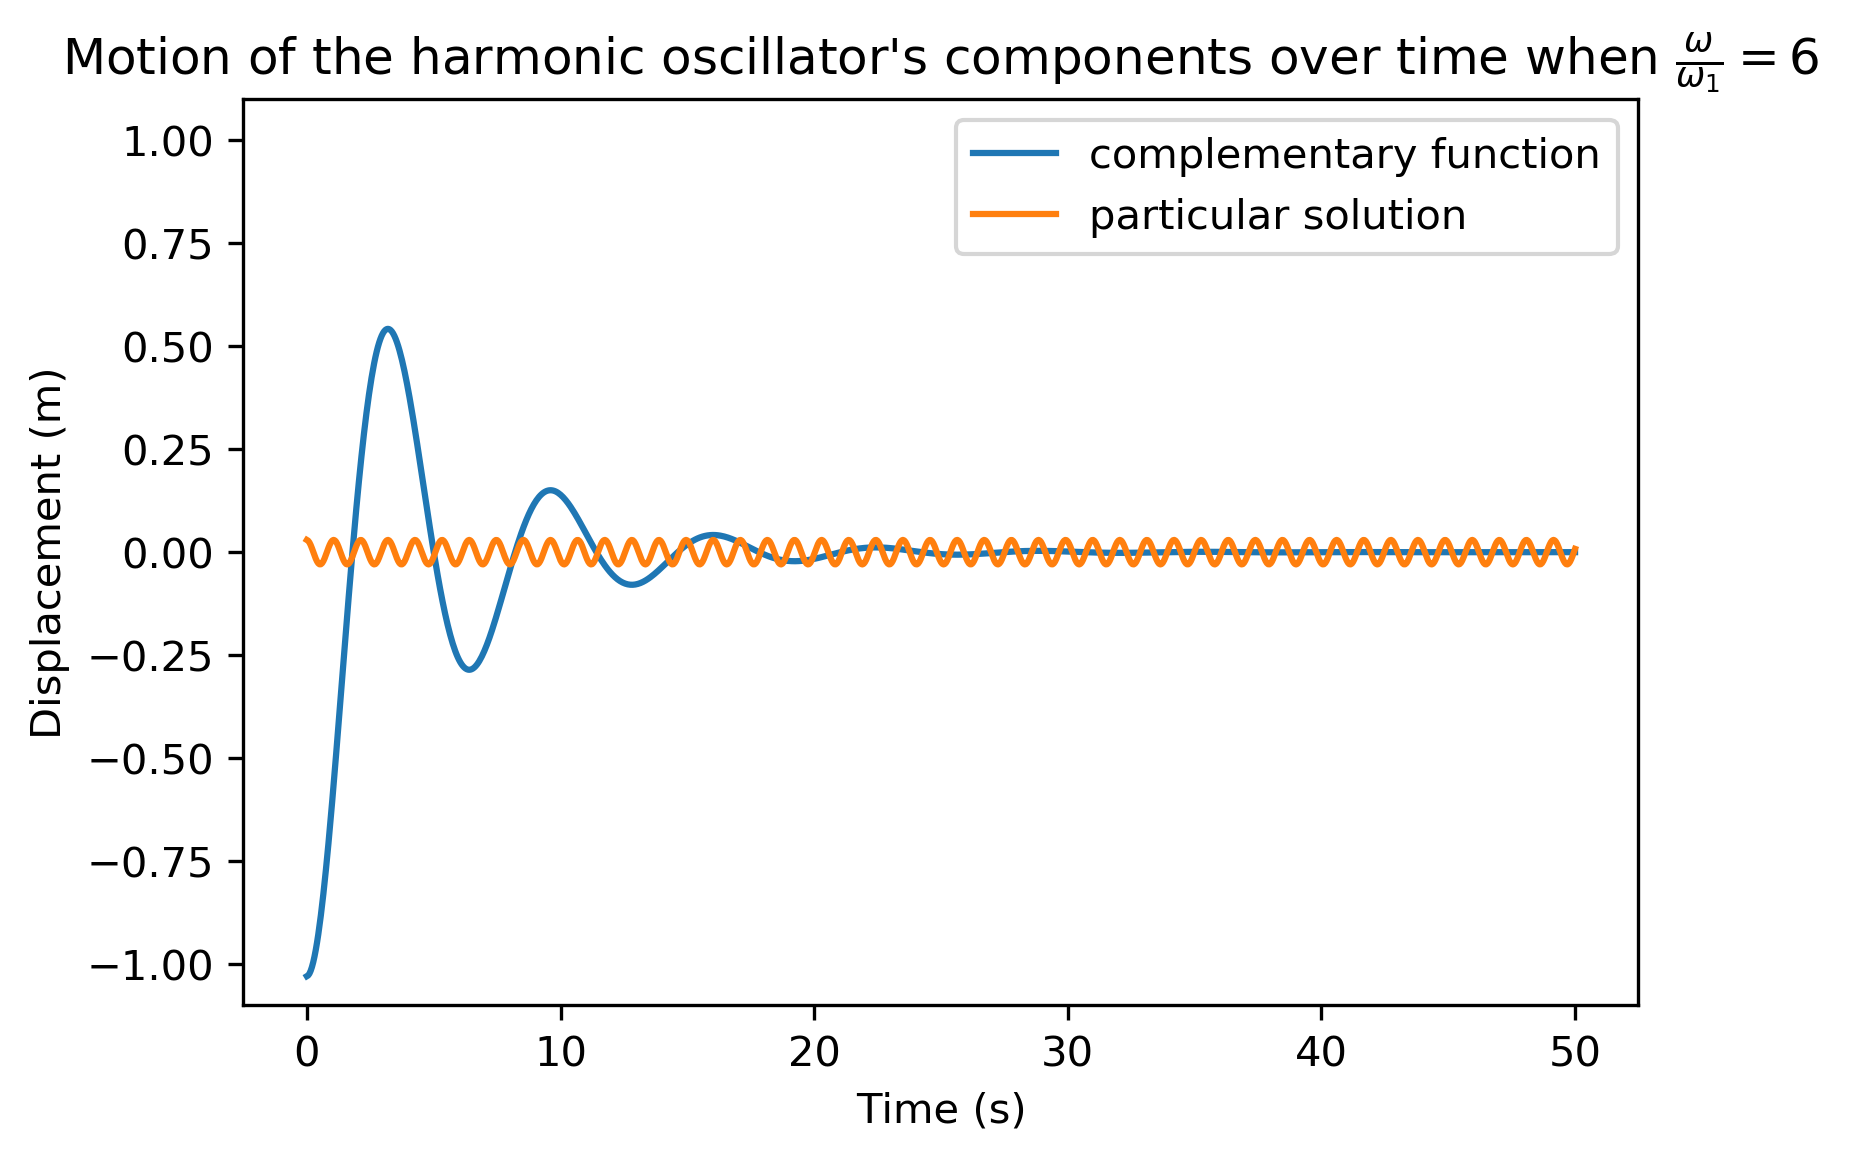

In [9]:
plt.figure(dpi=300)
plt.plot(times_3, x_3, label=r'$\frac{\omega}{\omega_1} = 6$')
plt.ylim(-1.1, 1.1)
plt.title(r"Motion of the harmonic oscillator over time when $\frac{\omega}{\omega_1} = 6$")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.plot(times_3, xc_3, label='complementary function')
plt.plot(times_3, xp_3, label='particular solution')
plt.ylim(-1.1, 1.1)
plt.title(r"Motion of the harmonic oscillator's components over time when $\frac{\omega}{\omega_1} = 6$")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.show()

### Part D
##### Discuss differences in amplitude and period

In the first case where $\frac{\omega}{\omega_1} = \frac{1}{9}$, the motion of the harmonic oscillator is sinusoidal with amplitude = 1 m. The motion is largely determined by the driving force. In the second case where $\frac{\omega}{\omega_1} = 0.9$, the system is very close to resonance. This increases the amplitude to more than 2 m. The period is also much shorter then the first case. In the third case where $\frac{\omega}{\omega_1} = 6$, the amplitude is very small compared to the other two cases. The period is also smaller then the other two cases. This is because the driving force is oscillating too fast for the harmonic system to respond.

### Part E
##### Making phase plots of the harmonic oscillator's motion

$$v(t) = \frac{dx}{dt}$$
$$= c_1(-\beta + \sqrt{\beta^2 - \omega_0^2})e^{(-\beta + \sqrt{\beta^2 - \omega_0^2})t} + c_2(-\beta - \sqrt{\beta^2 - \omega_0^2})e^{(-\beta - \sqrt{\beta^2 - \omega_0^2})t} - \frac{F_0\omega}{m\sqrt{(\omega_0^2 - \omega^2)^2 + (2\beta\omega)^2}}sin(\omega t - Arctan(\frac{2\beta\omega}{\omega_0^2 - \omega^2}))$$

In [10]:
# Case 1: w/w1 = 1/9
vc = [c1*(-1*beta + (beta**2 - omega0**2)**0.5)*np.exp((-1*beta + (beta**2 - omega0**2)**0.5)*t) + 
      c2*(-1*beta - (beta**2 - omega0**2)**0.5)*np.exp((-1*beta - (beta**2 - omega0**2)**0.5)*t) 
      for t in times]
vp = [(A*omega/R)*np.sin(omega*t - phi) for t in times]
v = np.subtract(vc, vp)

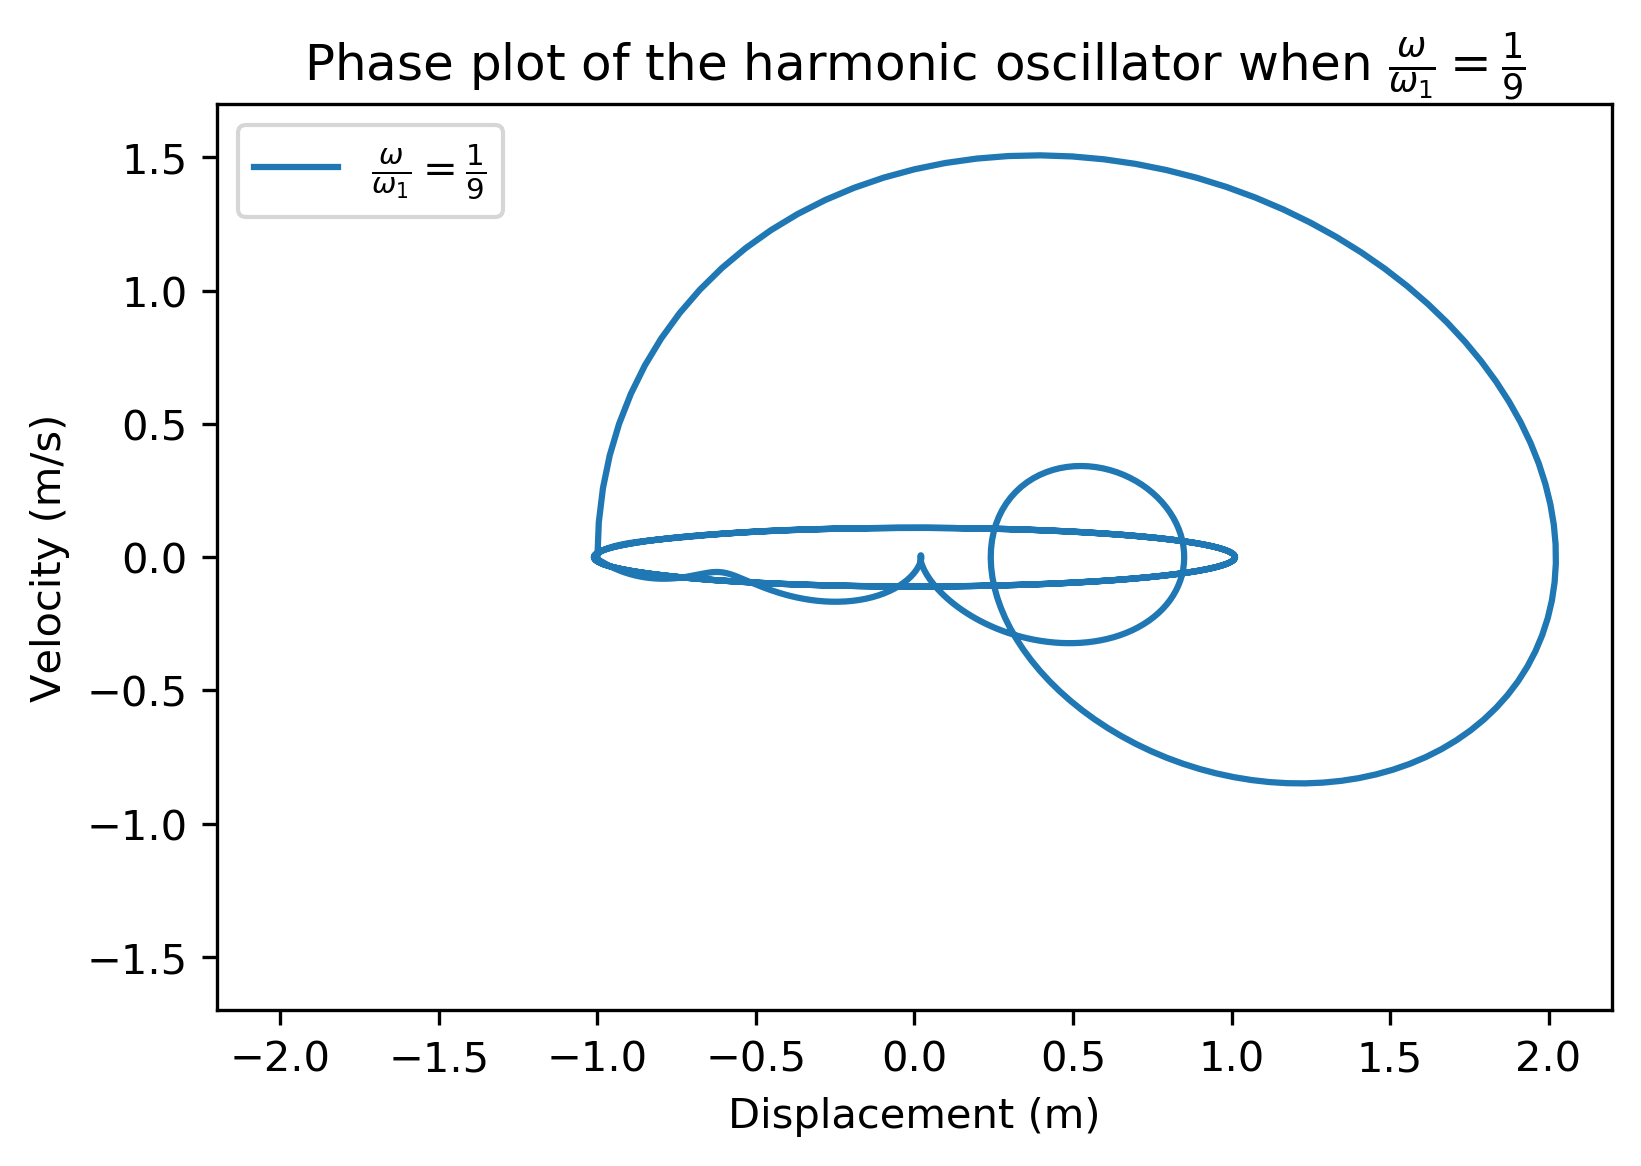

In [11]:
plt.figure(dpi=300)
plt.plot(x, v, label=r'$\frac{\omega}{\omega_1} = \frac{1}{9}$')
plt.xlim(-2.2, 2.2)
plt.ylim(-1.7, 1.7)
plt.title(r"Phase plot of the harmonic oscillator when $\frac{\omega}{\omega_1} = \frac{1}{9}$")
plt.ylabel("Velocity (m/s)")
plt.xlabel("Displacement (m)")
plt.legend(loc=2)
plt.show()

In [12]:
# Case 2: w/w1 = 0.9
vc_2 = [c1_2*(-1*beta + (beta**2 - omega0**2)**0.5)*np.exp((-1*beta + (beta**2 - omega0**2)**0.5)*t) + 
      c2_2*(-1*beta - (beta**2 - omega0**2)**0.5)*np.exp((-1*beta - (beta**2 - omega0**2)**0.5)*t) 
      for t in times_2]
vp_2 = [(A*omega_2/R_2)*np.sin(omega_2*t - phi_2) for t in times_2]
v_2 = np.subtract(vc_2, vp_2)

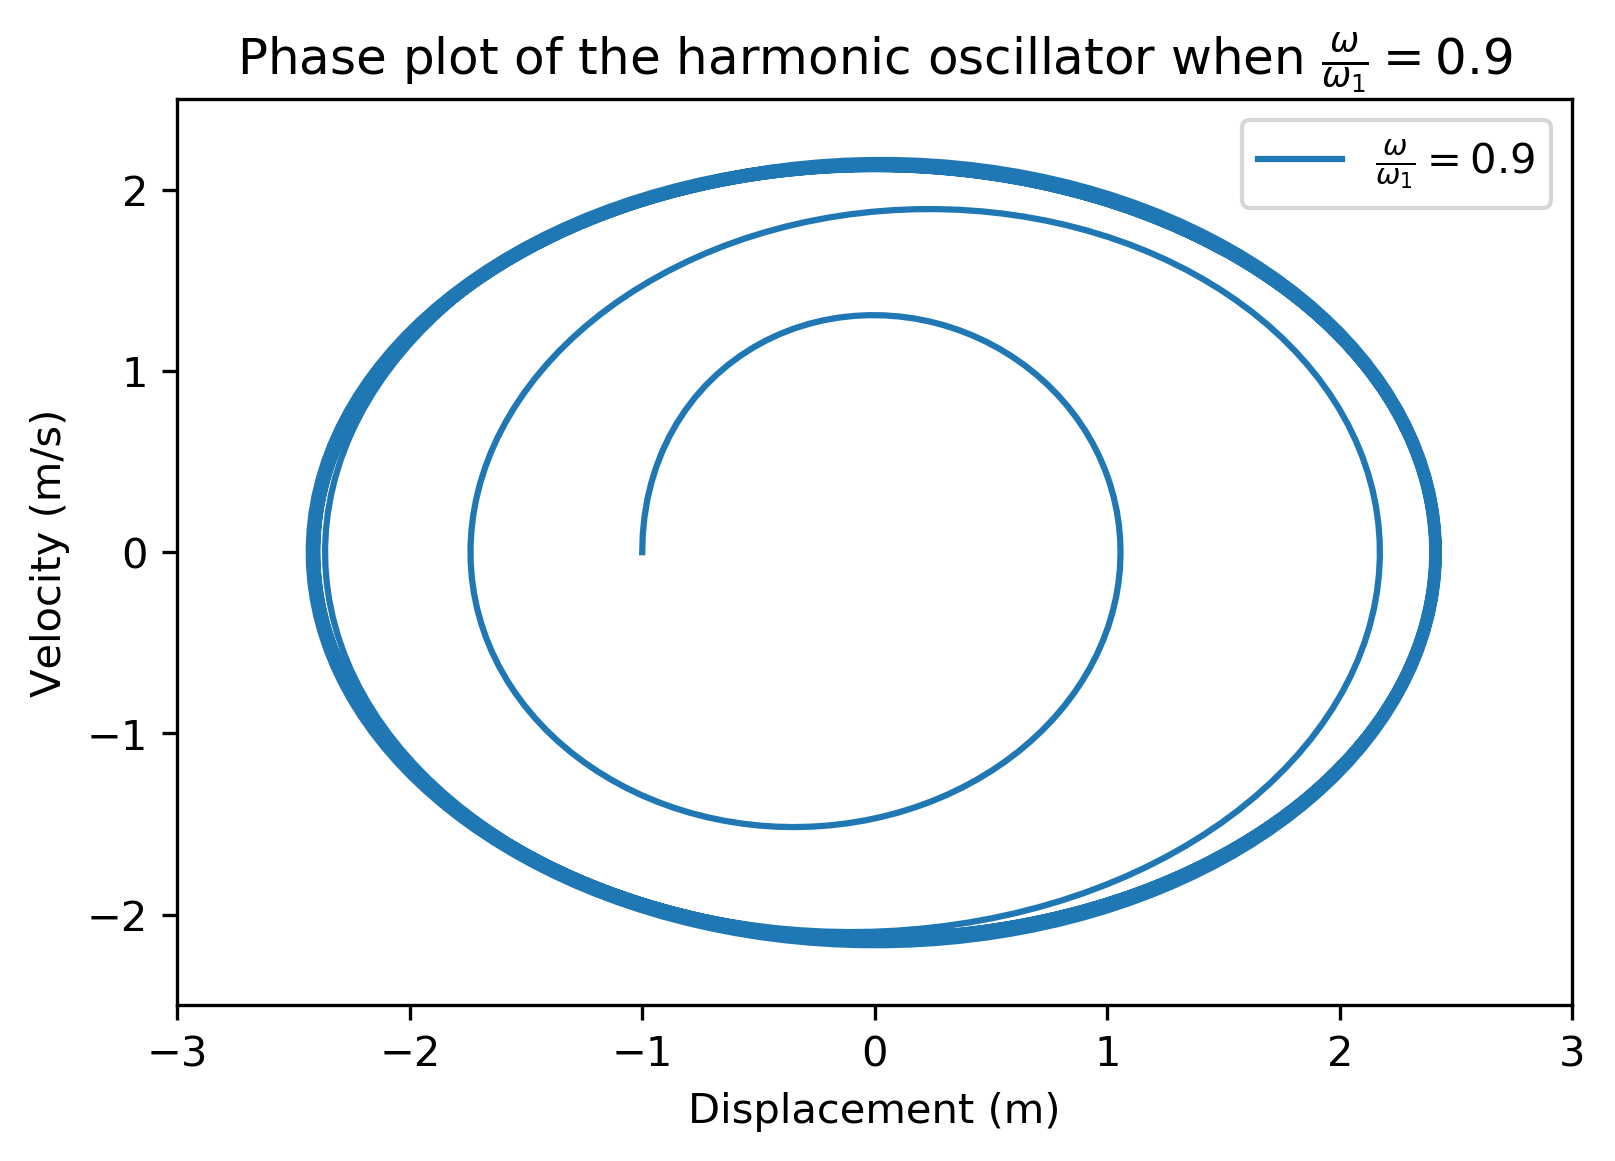

In [13]:
plt.figure(dpi=300)
plt.plot(x_2, v_2, label=r'$\frac{\omega}{\omega_1} = 0.9$')
plt.xlim(-3, 3)
plt.ylim(-2.5, 2.5)
plt.title(r"Phase plot of the harmonic oscillator when $\frac{\omega}{\omega_1} = 0.9$")
plt.ylabel("Velocity (m/s)")
plt.xlabel("Displacement (m)")
plt.legend()
plt.show()

In [14]:
# Case 3: w/w1 = 6
vc_3 = [c1_3*(-1*beta + (beta**2 - omega0**2)**0.5)*np.exp((-1*beta + (beta**2 - omega0**2)**0.5)*t) + 
      c2_3*(-1*beta - (beta**2 - omega0**2)**0.5)*np.exp((-1*beta - (beta**2 - omega0**2)**0.5)*t) 
      for t in times_3]
vp_3 = [(A*omega_3/R_3)*np.sin(omega_3*t - phi_3) for t in times_3]
v_3 = np.subtract(vc_3, vp_3)

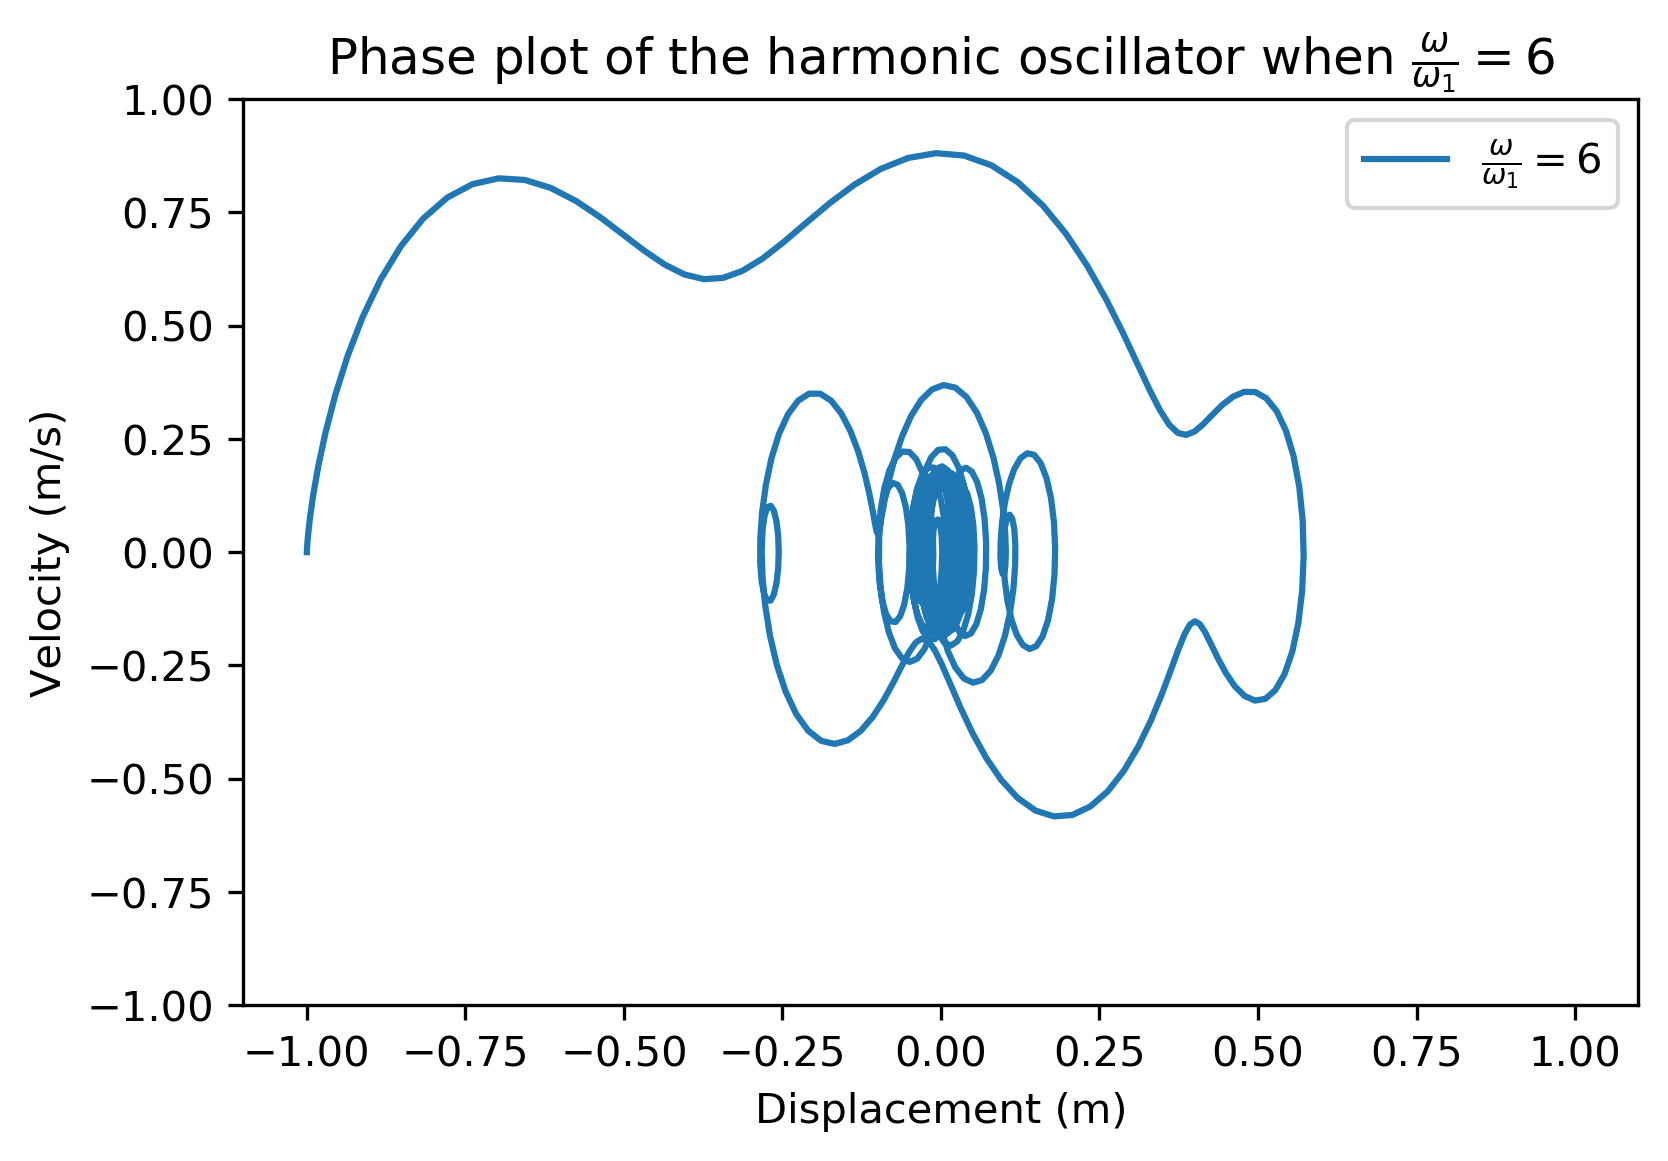

In [15]:
plt.figure(dpi=300)
plt.plot(x_3, v_3, label=r'$\frac{\omega}{\omega_1} = 6$')
plt.xlim(-1.1, 1.1)
plt.ylim(-1, 1)
plt.title(r"Phase plot of the harmonic oscillator when $\frac{\omega}{\omega_1} = 6$")
plt.ylabel("Velocity (m/s)")
plt.xlabel("Displacement (m)")
plt.legend()
plt.show()

### Part F
##### How to verify this is a steady-state solution

Steady-state motion appears on a phase plot as a closed loop. If a closed loop appears on the phase plots above, then we can determine that steady-state motion is occuring.

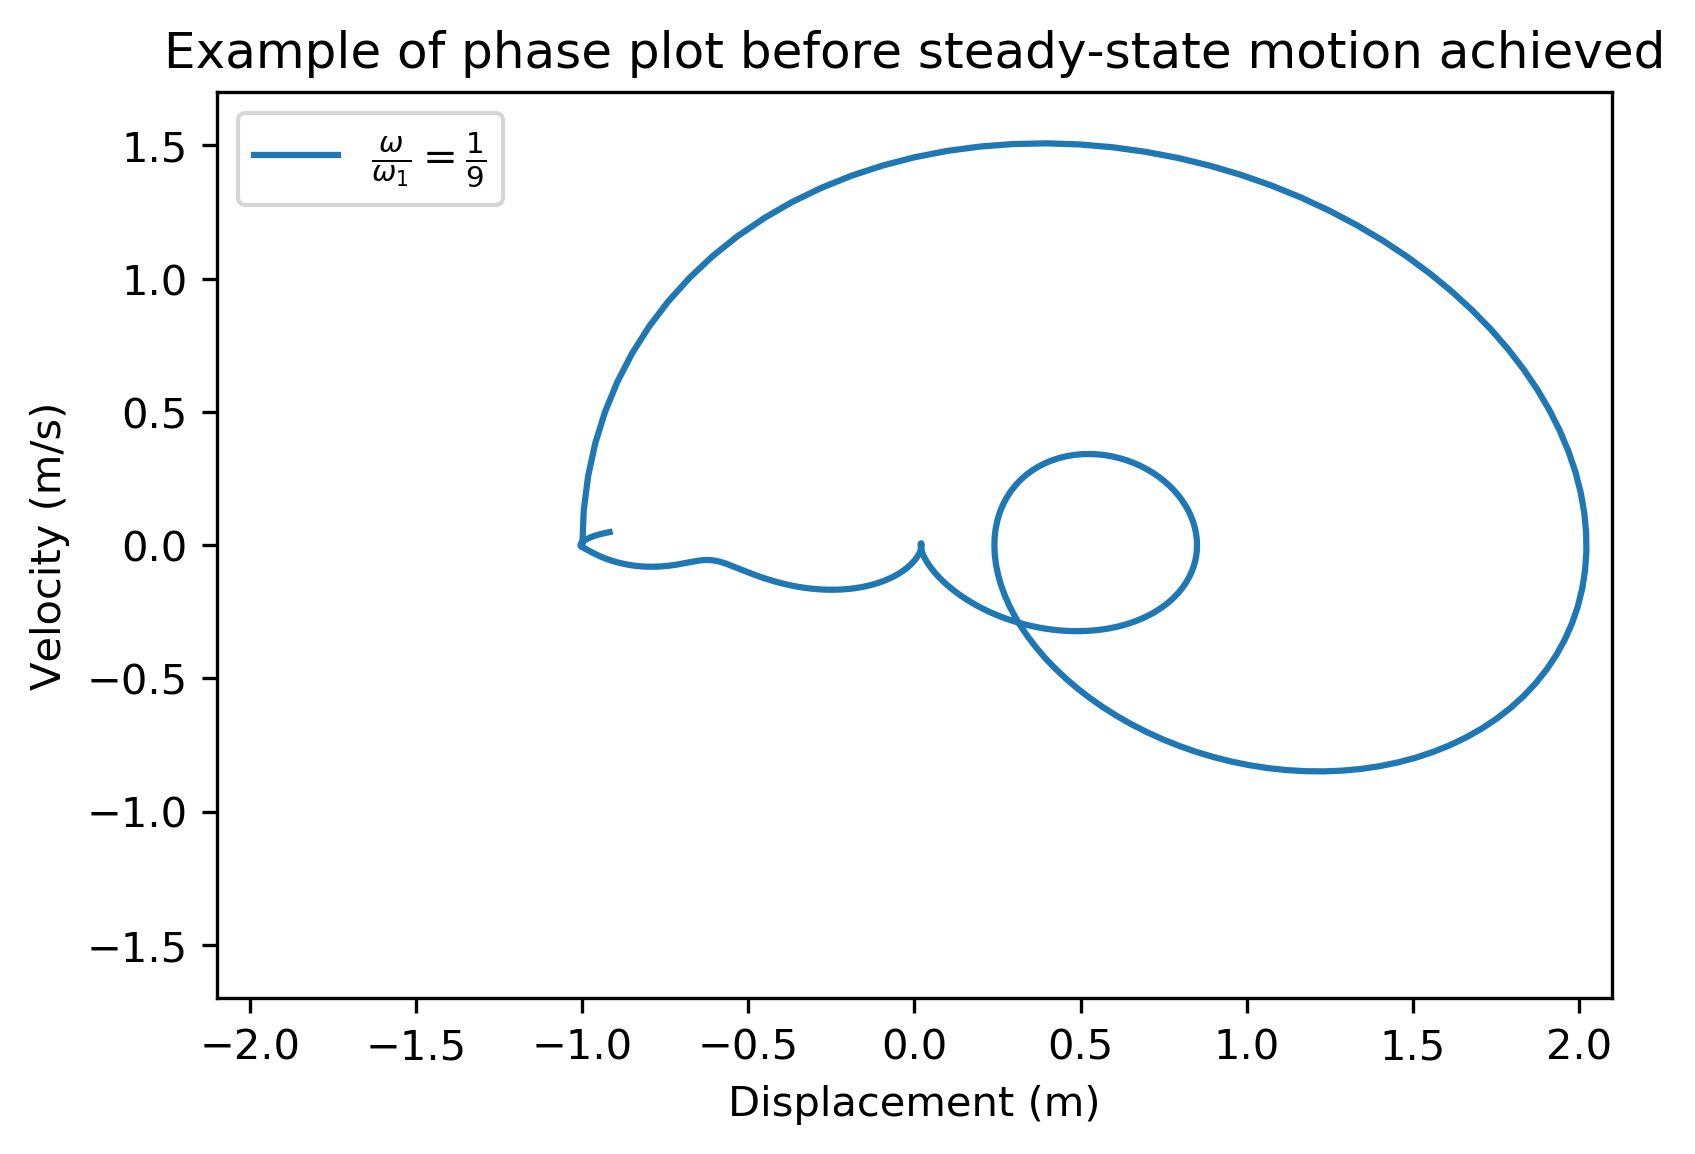

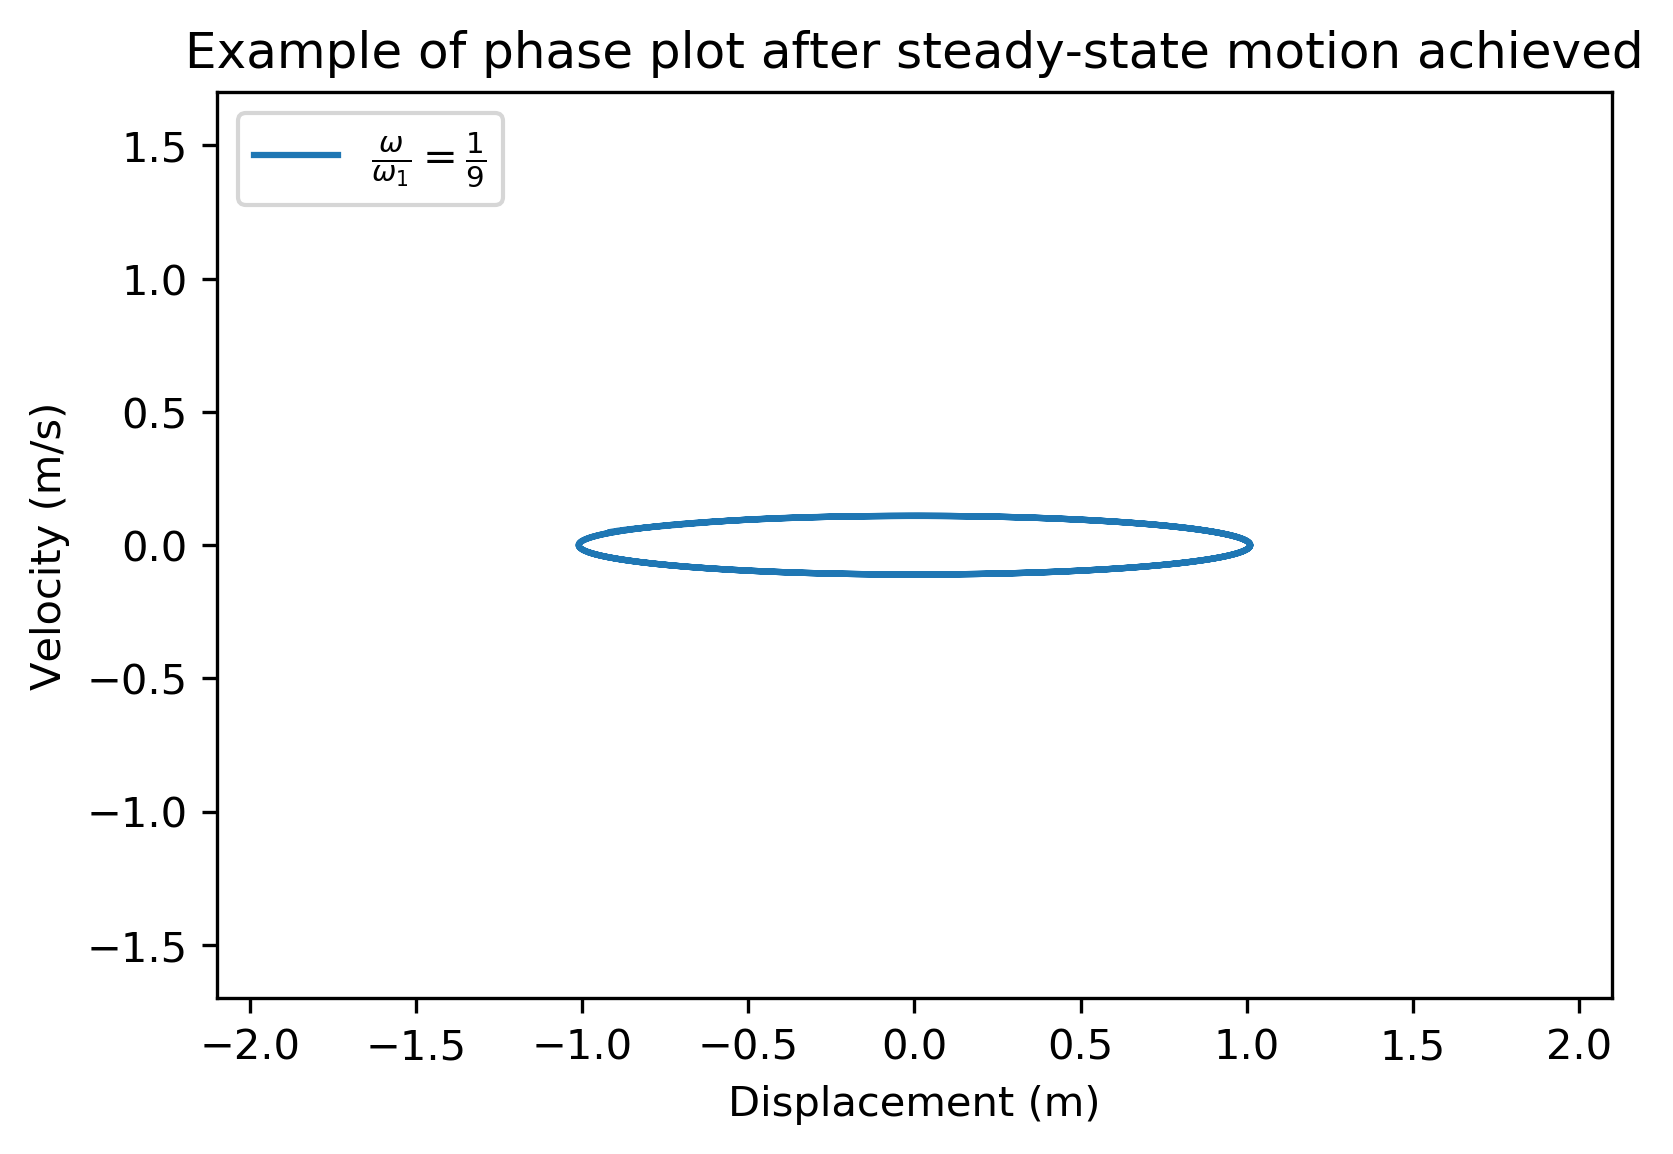

In [107]:
# Case 1 w/w1 = 1/9 before steady state achieved
plt.figure(dpi=300)
plt.plot(x[0:500], v[0:500], label=r'$\frac{\omega}{\omega_1} = \frac{1}{9}$')
plt.xlim(-2.1, 2.1)
plt.ylim(-1.7, 1.7)
plt.title("Example of phase plot before steady-state motion achieved")
plt.xlabel("Displacement (m)")
plt.ylabel("Velocity (m/s)")
plt.legend(loc=2)
plt.show()

# Case 1 w/w1 = 1/9 after steady state achieved
plt.figure(dpi=300)
plt.plot(x[500:-1], v[500:-1], label=r'$\frac{\omega}{\omega_1} = \frac{1}{9}$')
plt.xlim(-2.1, 2.1)
plt.ylim(-1.7, 1.7)
plt.title("Example of phase plot after steady-state motion achieved")
plt.xlabel("Displacement (m)")
plt.ylabel("Velocity (m/s)")
plt.legend(loc=2)
plt.show()

### Part G
##### Plotting energies

In [17]:
# Case 1: w/w1 = 1/9
ke = 0.5*m*np.multiply(v, v)
uu = 0.5*k*np.multiply(x, x)
te = np.add(ke, uu)

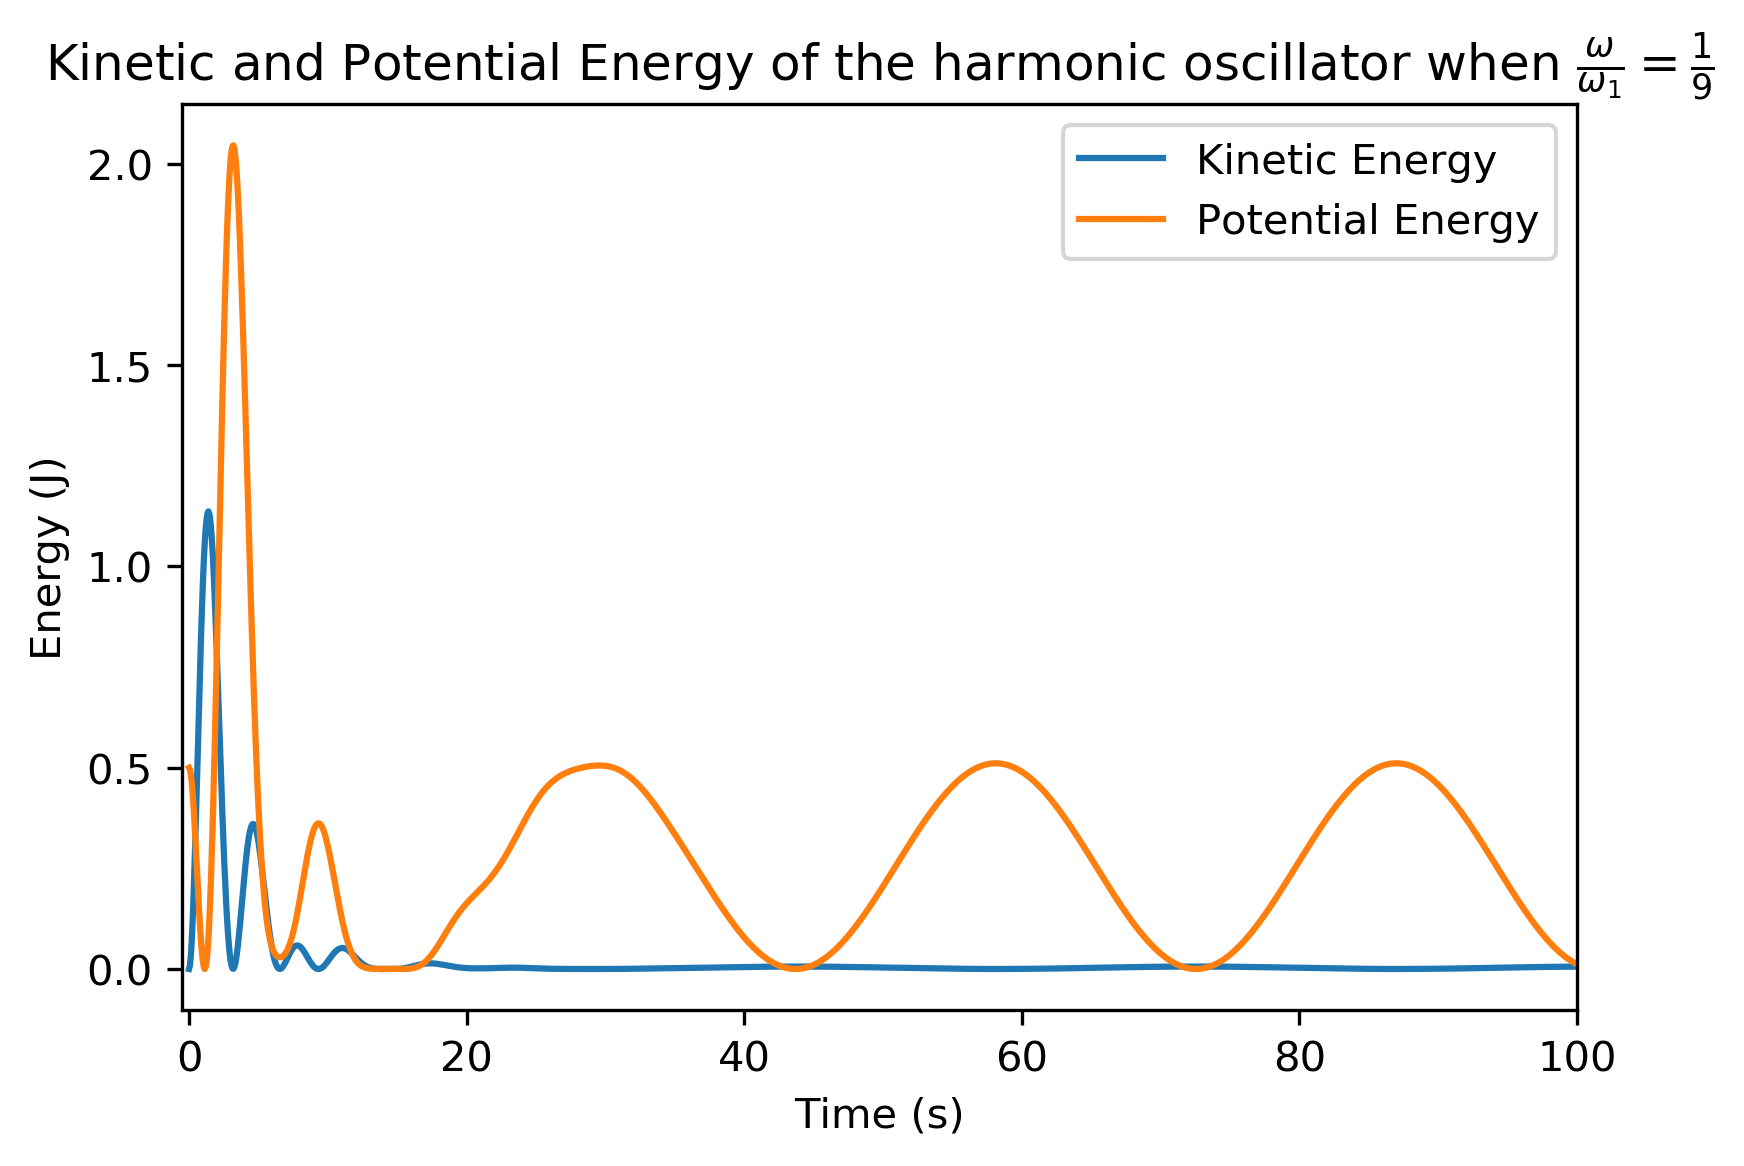

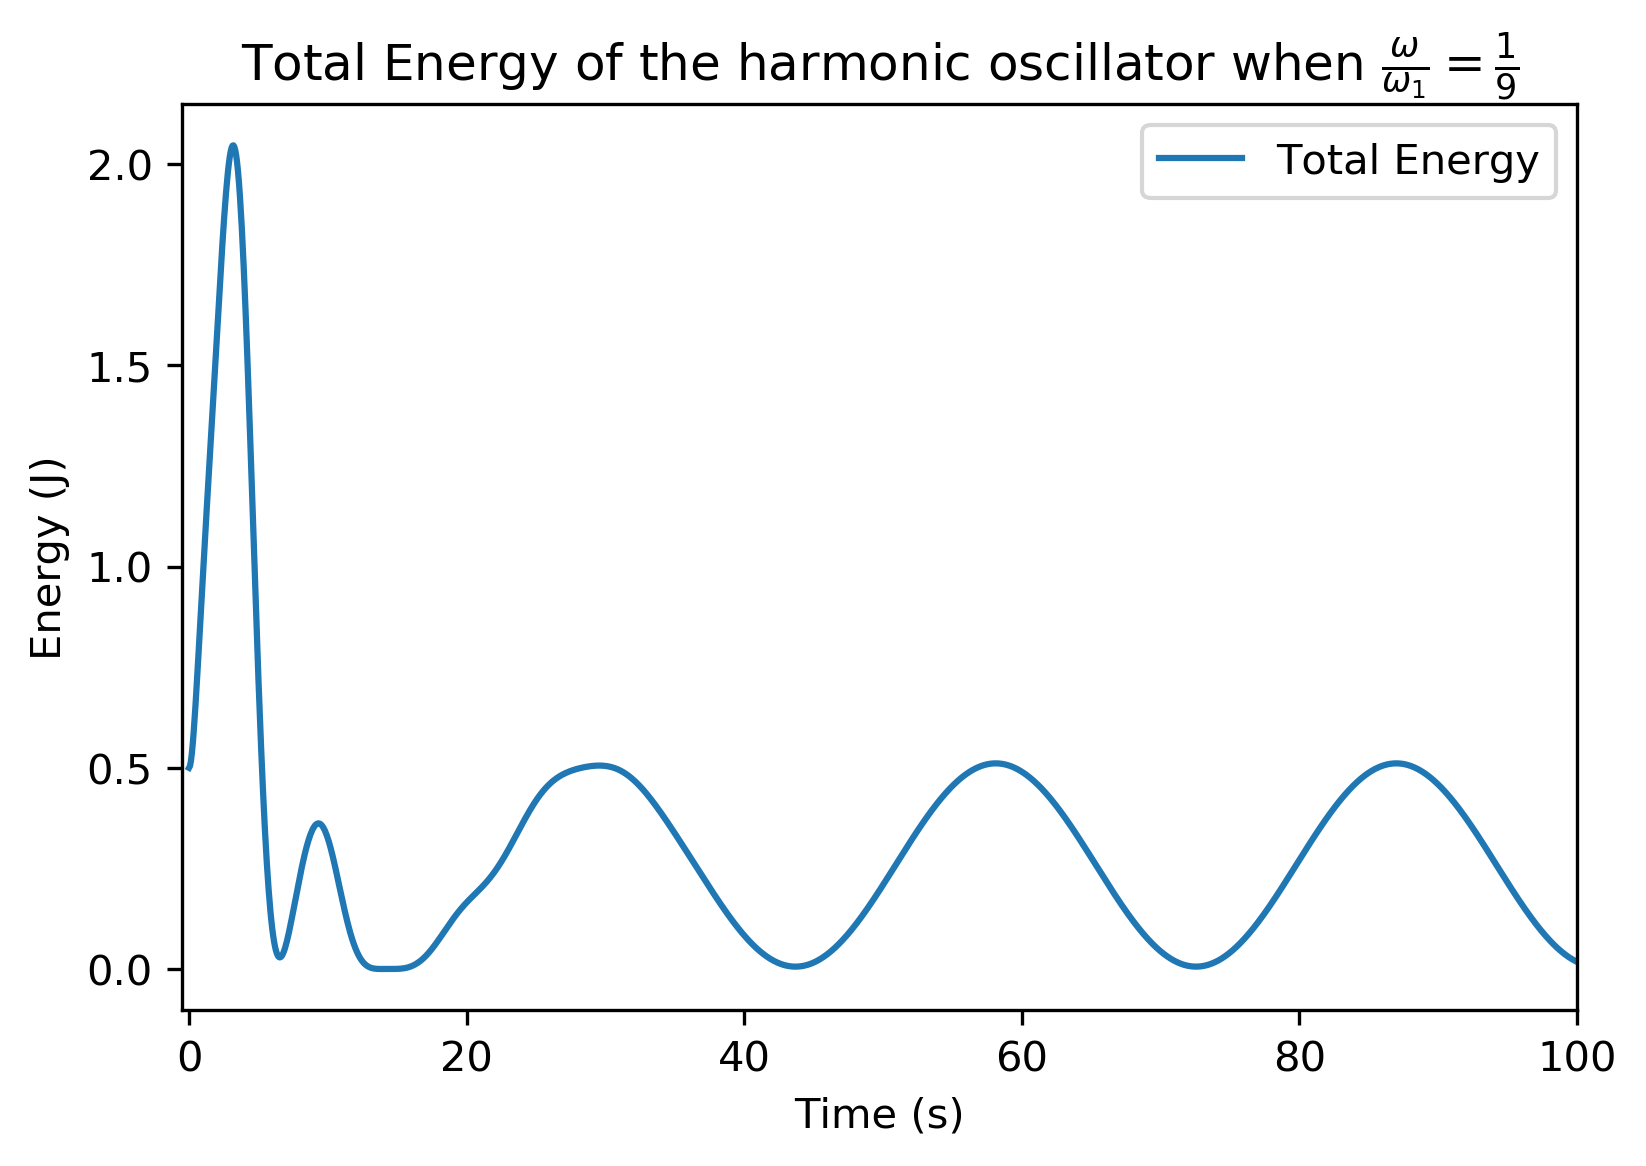

In [18]:
plt.figure(dpi=300)
plt.plot(times, ke, label='Kinetic Energy')
plt.plot(times, uu, label='Potential Energy')
plt.xlim(-0.5, 100)
plt.title(r"Kinetic and Potential Energy of the harmonic oscillator when $\frac{\omega}{\omega_1} = \frac{1}{9}$")
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.plot(times, te, label='Total Energy')
plt.xlim(-0.5, 100)
plt.title(r"Total Energy of the harmonic oscillator when $\frac{\omega}{\omega_1} = \frac{1}{9}$")
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

In [19]:
# Case 2: w/w1 = 0.9
ke_2 = 0.5*m*np.multiply(v_2, v_2)
u_2 = 0.5*k*np.multiply(x_2, x_2)
te_2 = np.add(ke_2, u_2)

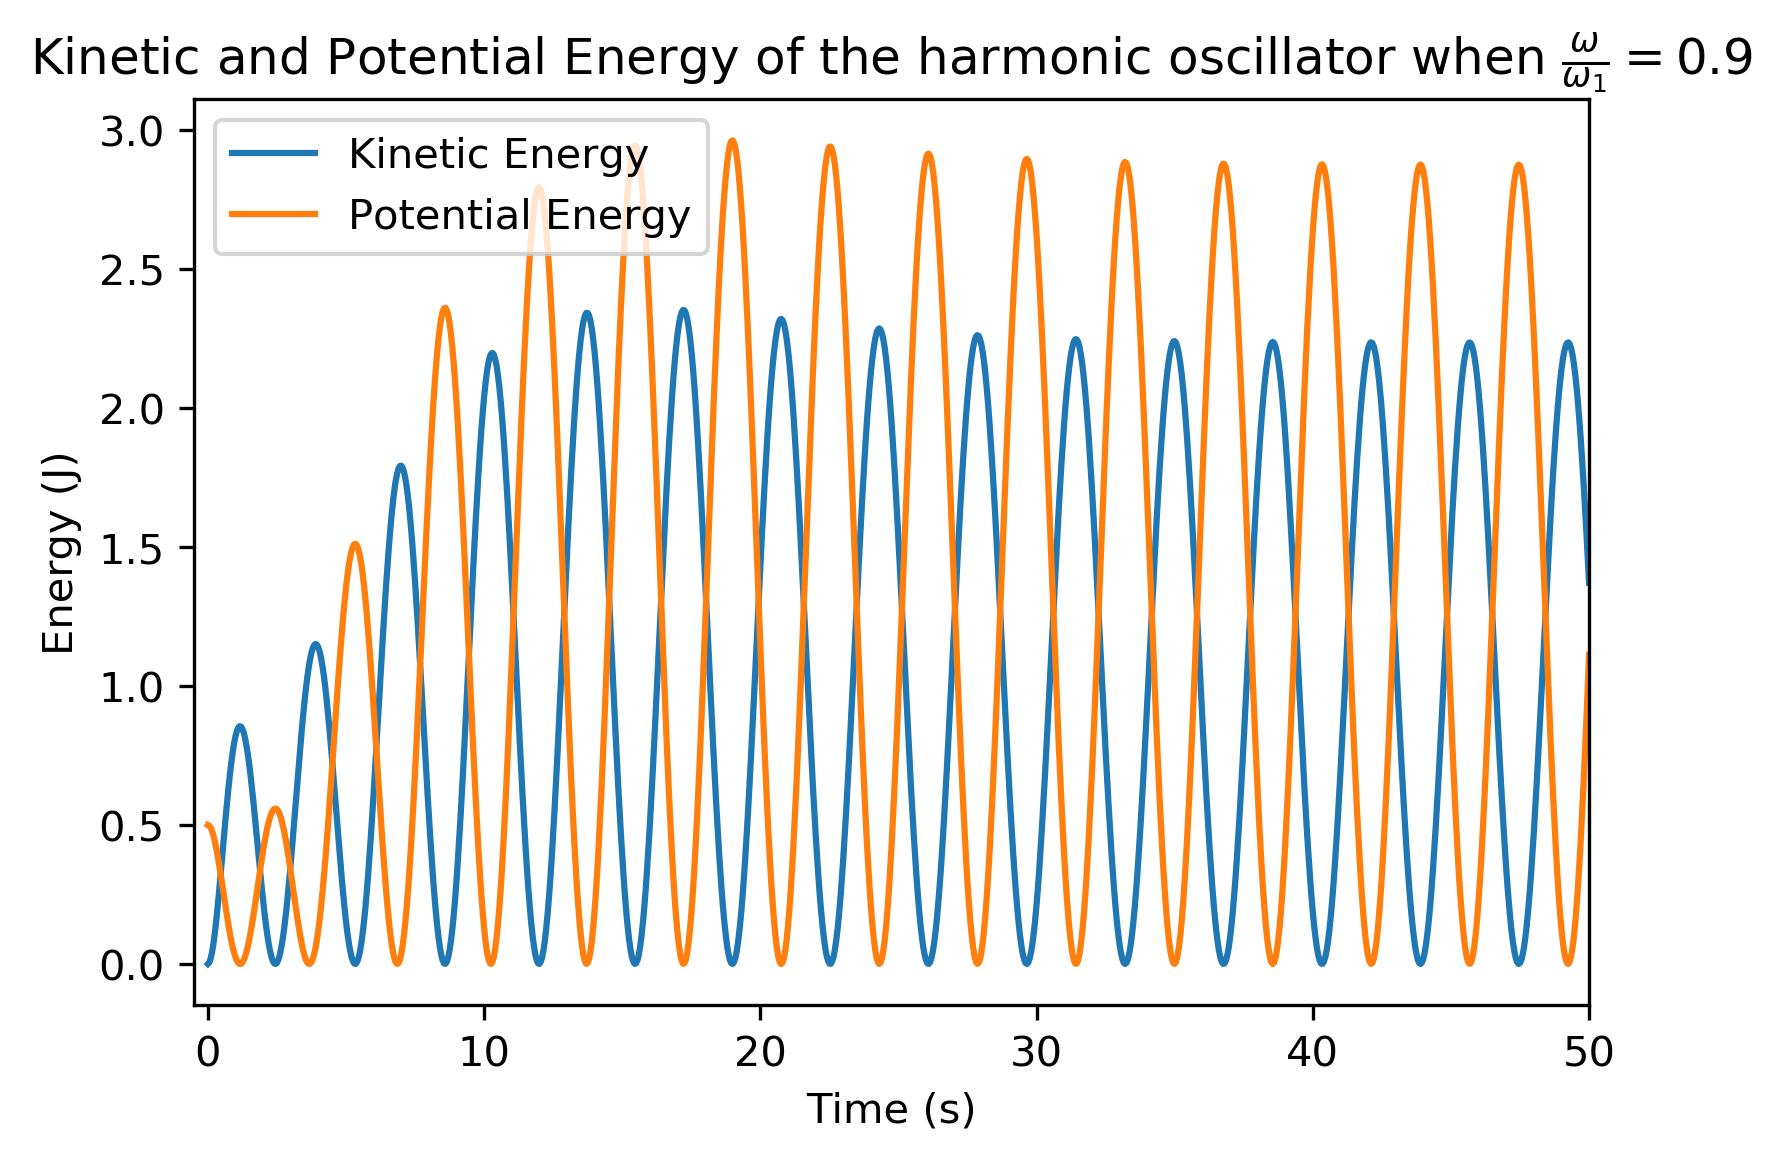

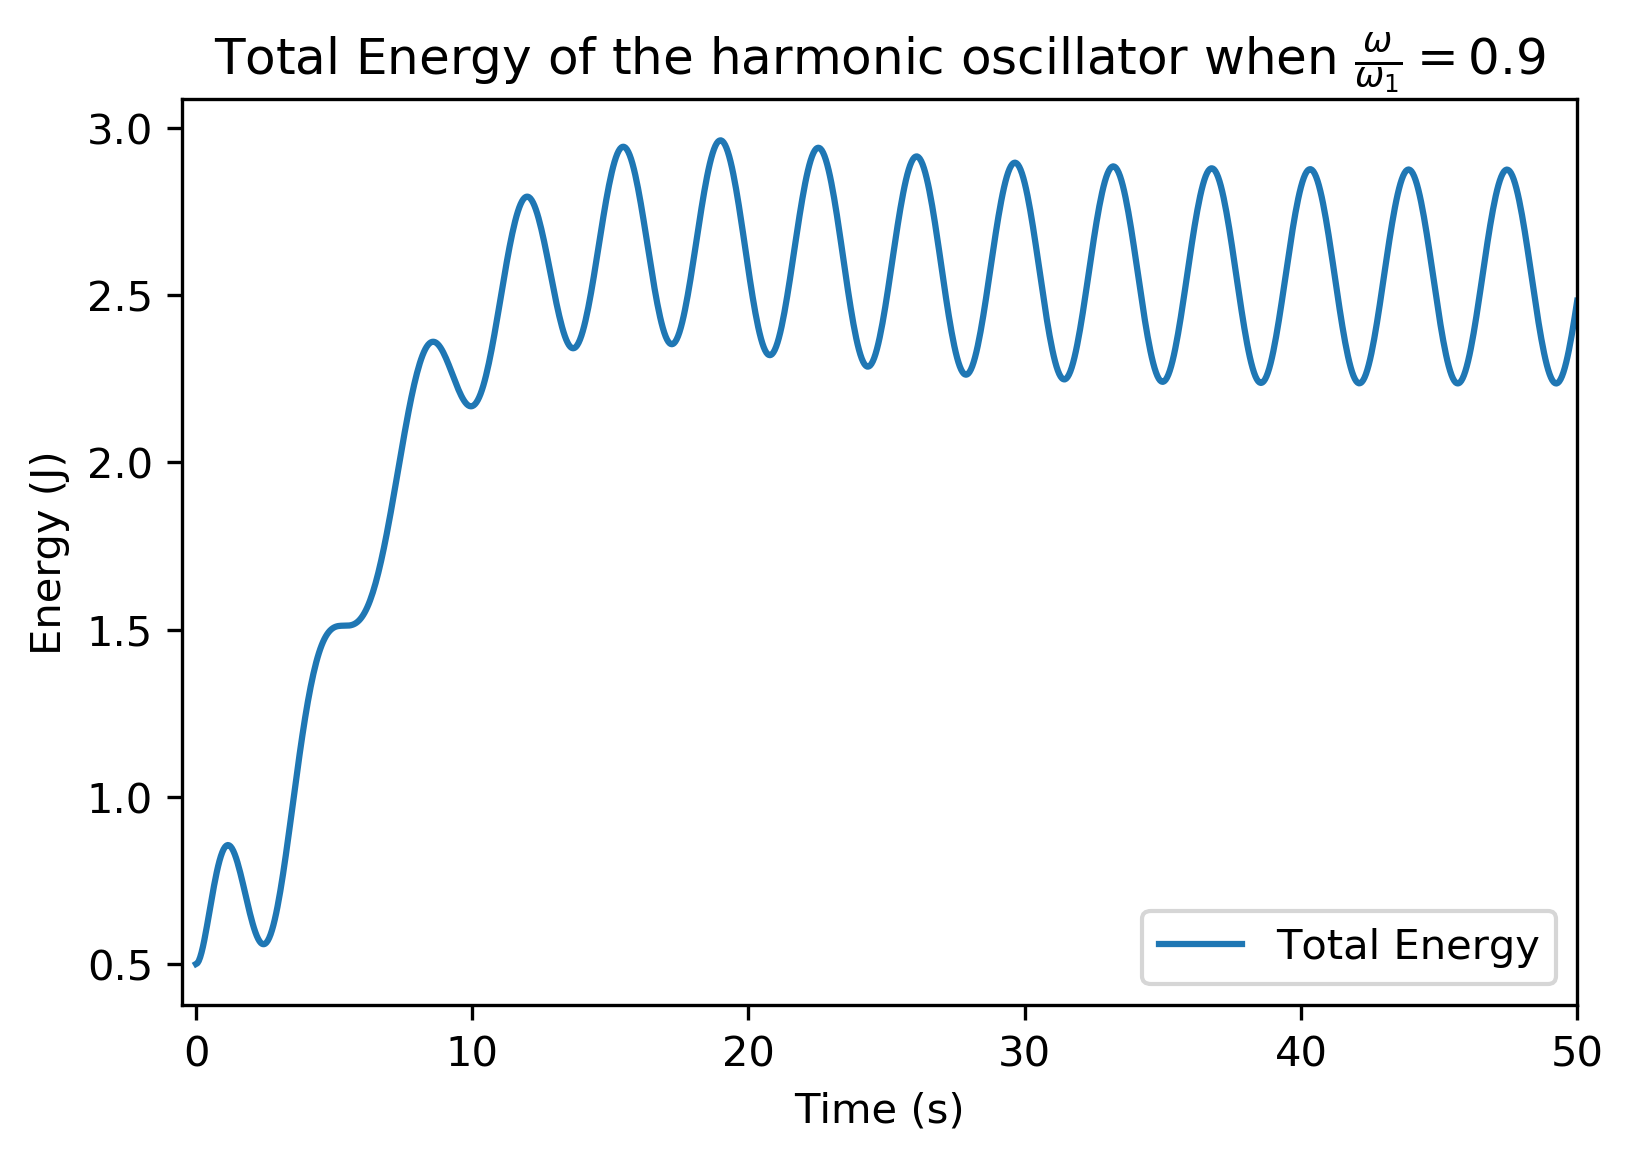

In [79]:
plt.figure(dpi=300)
plt.plot(times_2, ke_2, label='Kinetic Energy')
plt.plot(times_2, u_2, label='Potential Energy')
plt.xlim(-0.5, 50)
plt.title(r"Kinetic and Potential Energy of the harmonic oscillator when $\frac{\omega}{\omega_1} = 0.9$")
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.plot(times_2, te_2, label='Total Energy')
plt.xlim(-0.5, 50)
plt.title(r"Total Energy of the harmonic oscillator when $\frac{\omega}{\omega_1} = 0.9$")
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

In [21]:
# Case 3: w/w1 = 6
ke_3 = 0.5*m*np.multiply(v_3, v_3)
u_3 = 0.5*k*np.multiply(x_3, x_3)
te_3 = np.add(ke_3, u_3)

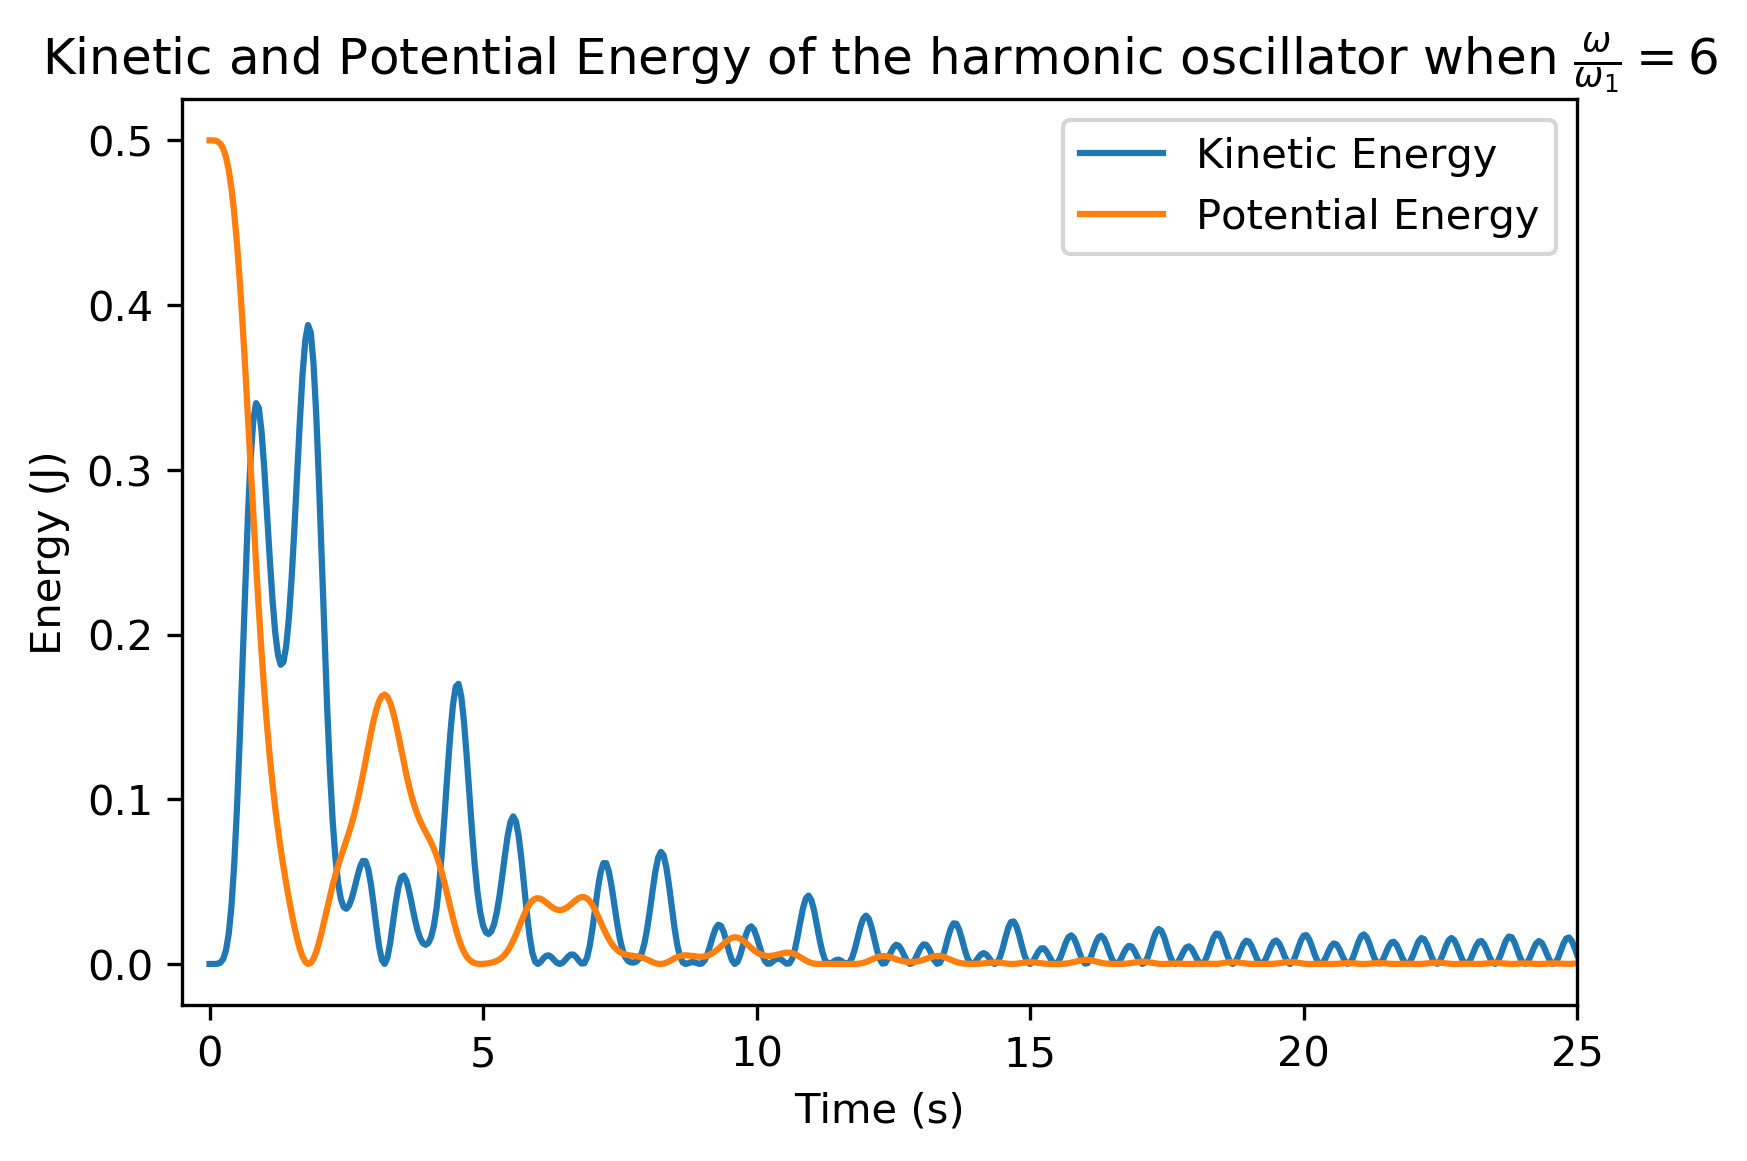

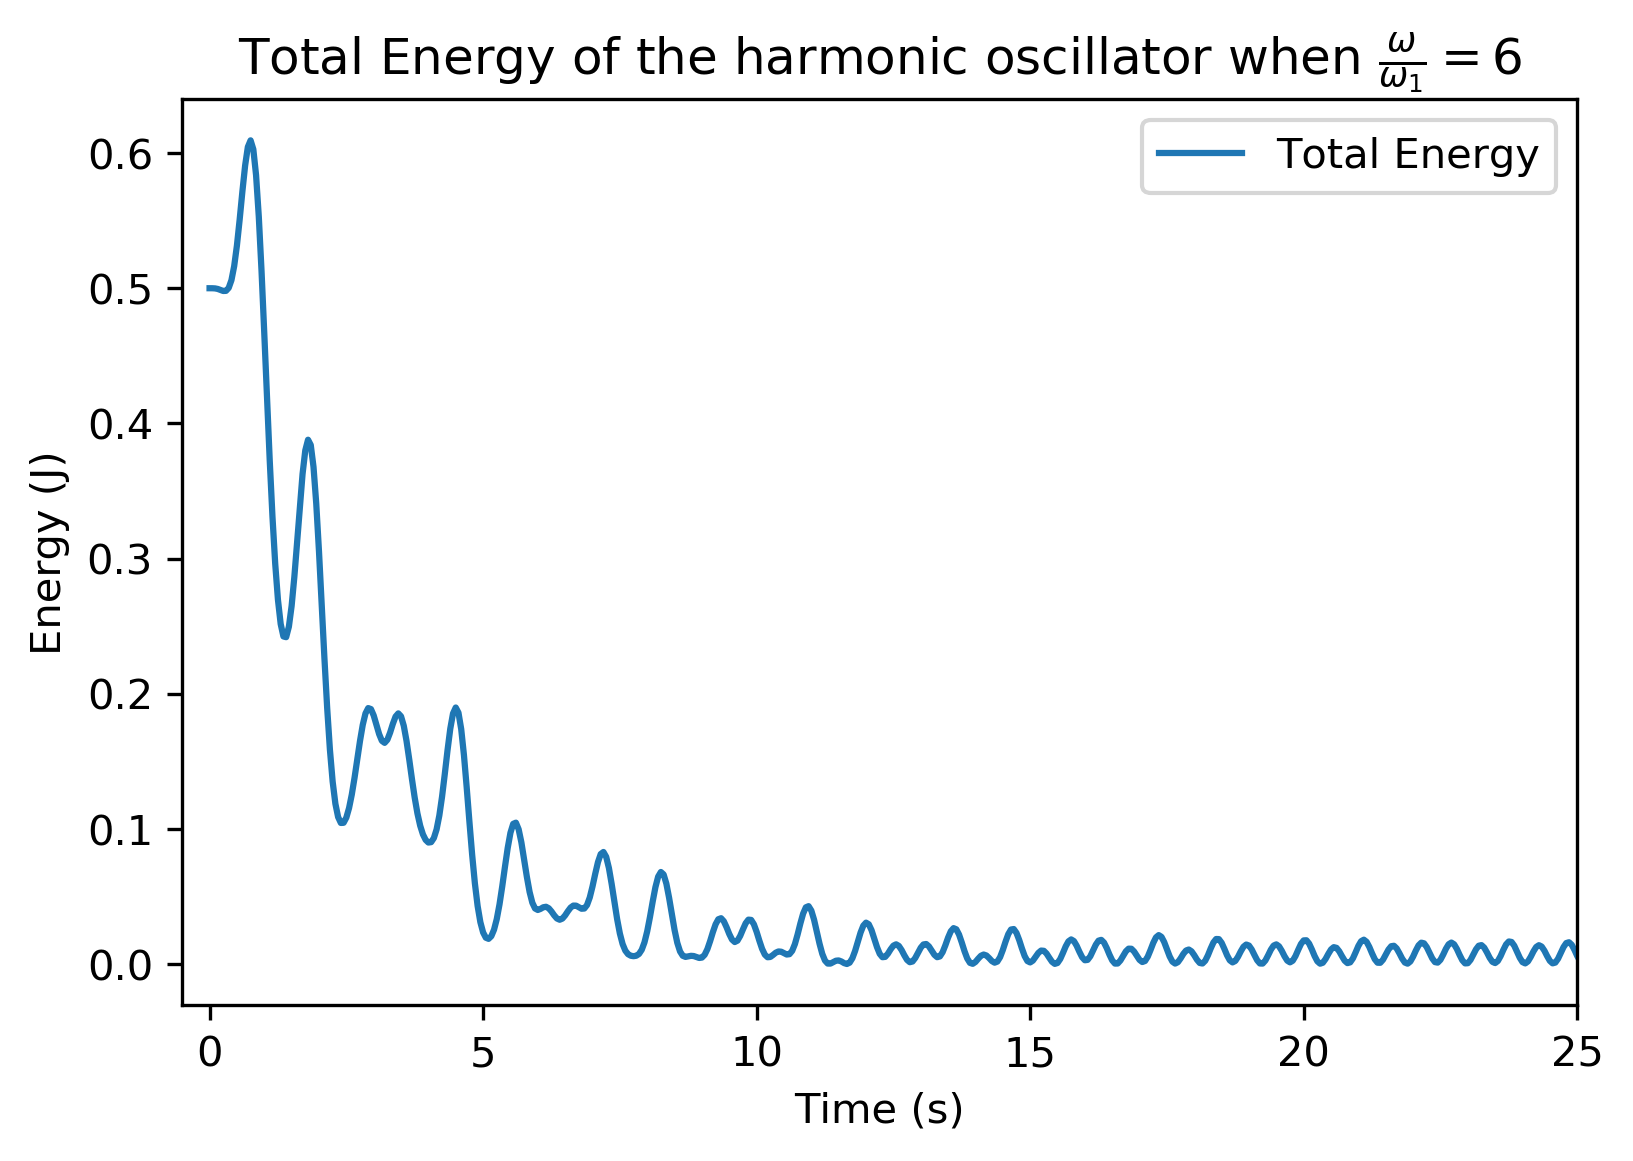

In [22]:
plt.figure(dpi=300)
plt.plot(times_3, ke_3, label='Kinetic Energy')
plt.plot(times_3, u_3, label='Potential Energy')
plt.xlim(-0.5, 25)
plt.title(r"Kinetic and Potential Energy of the harmonic oscillator when $\frac{\omega}{\omega_1} = 6$")
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.plot(times_3, te_3, label='Total Energy')
plt.xlim(-0.5, 25)
plt.title(r"Total Energy of the harmonic oscillator when $\frac{\omega}{\omega_1} = 6$")
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

When $\frac{\omega}{\omega_1}$ is near 1 (meaning the system is near resonance), the total energy oscillates around a median greater than the oscillation center of when $\frac{\omega}{\omega_1}$ is small. When $\frac{\omega}{\omega_1}$ is much larger than 1, the frequency of oscillation of the total energy is higher than the other two cases. The amplitude is also much smaller then the other two cases. The oscillation center is also close to 0.

### Part H
##### Time-average of energies over one cycle

In [89]:
# Case 1: w/w1 = 1/9
# Calculating time average of kinetic energy after steady-state achieved
dt = times[1]-times[0]
newTimes = np.linspace(1200, len(times) - 2, (len(times)-1201), dtype=int)
aveKE = (1/(times[-1] - times[1200]))*np.sum([0.5*(ke[t] + ke[t+1])*dt for t in newTimes])
print("Average Kinetic Energy:", np.real(aveKE), "J")

# Calculating time average of potential energy after steady-state achieved
avePE = (1/(times[-1] - times[1200]))*np.sum([0.5*(uu[t] + uu[t+1])*dt for t in newTimes])
print("Average Potential Energy:", np.real(avePE), "J")

# Calculating time average of total energy after steady-state achieved
aveTE = (1/(times[-1] - times[1200]))*np.sum([0.5*(te[t] + te[t+1])*dt for t in newTimes])
print("Average Total Energy:", np.real(aveTE), "J")
print("Sum of average kinetic and potential energies:", np.real(aveKE + avePE), "J")

Average Kinetic Energy: 0.0029708121097835024 J
Average Potential Energy: 0.2604111355852446 J
Average Total Energy: 0.26338194769502815 J
Sum of average kinetic and potential energies: 0.2633819476950281 J


In [93]:
# Case 2: w/w1 = 0.9
# Calculating time average of kinetic energy after steady-state achieved
dt_2 = times_2[1]-times_2[0]
newTimes_2 = np.linspace(800, len(times_2) - 2, (len(times_2)-801), dtype=int)
aveKE_2 = (1/(times_2[-1] - times_2[800]))*np.sum([0.5*(ke_2[t] + ke_2[t+1])*dt_2 for t in newTimes_2])
print("Average Kinetic Energy:", np.real(aveKE_2), "J")

# Calculating time average of potential energy after steady-state achieved
avePE_2 = (1/(times_2[-1] - times_2[800]))*np.sum([0.5*(u_2[t] + u_2[t+1])*dt_2 for t in newTimes_2])
print("Average Potential Energy:", np.real(avePE_2), "J")

# Calculating time average of total energy after steady-state achieved
aveTE_2 = (1/(times_2[-1] - times_2[800]))*np.sum([0.5*(te_2[t] + te_2[t+1])*dt_2 for t in newTimes_2])
print("Average Total Energy:", np.real(aveTE_2), "J")
print("Sum of average kinetic and potential energies:", np.real(aveKE_2 + avePE_2), "J")

Average Kinetic Energy: 1.1447284257239048 J
Average Potential Energy: 1.4036197084265627 J
Average Total Energy: 2.5483481341504675 J
Sum of average kinetic and potential energies: 2.5483481341504675 J


In [94]:
# Case 2: w/w1 = 6
# Calculating time average of kinetic energy after steady-state achieved
dt_3 = times_3[1]-times_3[0]
newTimes_3 = np.linspace(800, len(times_3) - 2, (len(times_3)-801), dtype=int)
aveKE_3 = (1/(times_3[-1] - times_3[800]))*np.sum([0.5*(ke_3[t] + ke_3[t+1])*dt_3 for t in newTimes_3])
print("Average Kinetic Energy:", np.real(aveKE_3), "J")

# Calculating time average of potential energy after steady-state achieved
avePE_3 = (1/(times_3[-1] - times_3[800]))*np.sum([0.5*(u_3[t] + u_3[t+1])*dt_3 for t in newTimes_3])
print("Average Potential Energy:", np.real(avePE_3), "J")

# Calculating time average of total energy after steady-state achieved
aveTE_3 = (1/(times_3[-1] - times_3[800]))*np.sum([0.5*(te_3[t] + te_3[t+1])*dt_3 for t in newTimes_3])
print("Average Total Energy:", np.real(aveTE_3), "J")
print("Sum of average kinetic and potential energies:", np.real(aveKE_3 + avePE_3), "J")

Average Kinetic Energy: 0.007622091517827334 J
Average Potential Energy: 0.00022130877563238777 J
Average Total Energy: 0.007843400293459722 J
Sum of average kinetic and potential energies: 0.007843400293459722 J


It seems to be that the time average of the total energy is equal to the time average of kinetic energy plus the time average of potential energy.